# Leopard challenge Classification

## Загрузка данных
Данные беру из leopard-challenge-classification.zip
https://drive.google.com/file/d/1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7/view?usp=sharing

# Colab

In [1]:
! gdown --id 1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/leopard-challenge-classification.zip -d /content/leopard-challenge-classification/

In [9]:
! unzip / content / leopard-challenge-classification.zip -d / content / leopard_challenge_classification /

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [32]:
import pandas as pd

In [1]:
df = pd.read_csv('/content/leopard_challenge_classification/train.csv')

NameError: name 'pd' is not defined

In [1]:
df.head()

NameError: name 'train' is not defined

In [ ]:
!pip install phik

!pip install feature_engine

!pip install catboost

# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('leopard-challenge-classification.zip', 'r') as zf:
    zf.extractall()

# 1. Задача

Дан набор данных с основными клиническими показателями людей.
Каждая строчка в датасете - клинические показатели одного человека - рост, вес, зрение и т.д.
**Задача:** Определить, курит человек или нет, на основании его показателей.

# 2. Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import phik
import folium
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.imputation import RandomSampleImputer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, log_loss
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")
plt.style.use('seaborn-colorblind')
pd.set_option('display.max_columns', 100)

# 3. Загрузка Датасета

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [4]:
df.shape

(13863, 26)

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [7]:
df_test.shape

(5942, 25)

# 4. PDA - Получение информации о Датасете

## 4.1 Подготовка таблиц

### Перевод названий колонок в строчные буквы и замена пробелов

In [8]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_').str.lower()
df_test.columns = df_test.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_').str.lower()

In [9]:
df.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


## 4.2 Основная информация о датасете

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height_cm_           13863 non-null  int64  
 3   weight_kg_           13863 non-null  int64  
 4   waist_cm_            13863 non-null  float64
 5   eyesight_left_       13863 non-null  float64
 6   eyesight_right_      13863 non-null  float64
 7   hearing_left_        13863 non-null  float64
 8   hearing_right_       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting_blood_sugar  13863 non-null  float64
 12  cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  hdl                  13863 non-null  float64
 15  ldl                  13863 non-null 

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5942 non-null   int64  
 1   age                  5942 non-null   int64  
 2   height_cm_           5942 non-null   int64  
 3   weight_kg_           5942 non-null   int64  
 4   waist_cm_            5942 non-null   float64
 5   eyesight_left_       5942 non-null   float64
 6   eyesight_right_      5942 non-null   float64
 7   hearing_left_        5942 non-null   float64
 8   hearing_right_       5942 non-null   float64
 9   systolic             5942 non-null   float64
 10  relaxation           5942 non-null   float64
 11  fasting_blood_sugar  5942 non-null   float64
 12  cholesterol          5942 non-null   float64
 13  triglyceride         5942 non-null   float64
 14  hdl                  5942 non-null   float64
 15  ldl                  5942 non-null   f

## 4.3 Пропущенные значения

In [12]:
df.isna().mean().sort_values(ascending=False)

id                     0.0
age                    0.0
tartar                 0.0
dental_caries          0.0
oral                   0.0
gtp                    0.0
alt                    0.0
ast                    0.0
serum_creatinine       0.0
urine_protein          0.0
hemoglobin             0.0
ldl                    0.0
hdl                    0.0
triglyceride           0.0
cholesterol            0.0
fasting_blood_sugar    0.0
relaxation             0.0
systolic               0.0
hearing_right_         0.0
hearing_left_          0.0
eyesight_right_        0.0
eyesight_left_         0.0
waist_cm_              0.0
weight_kg_             0.0
height_cm_             0.0
smoking                0.0
dtype: float64

In [13]:
df_test.isna().mean().sort_values(ascending=False)

id                     0.0
triglyceride           0.0
dental_caries          0.0
oral                   0.0
gtp                    0.0
alt                    0.0
ast                    0.0
serum_creatinine       0.0
urine_protein          0.0
hemoglobin             0.0
ldl                    0.0
hdl                    0.0
cholesterol            0.0
age                    0.0
fasting_blood_sugar    0.0
relaxation             0.0
systolic               0.0
hearing_right_         0.0
hearing_left_          0.0
eyesight_right_        0.0
eyesight_left_         0.0
waist_cm_              0.0
weight_kg_             0.0
height_cm_             0.0
tartar                 0.0
dtype: float64

**Пропуски в данных отсутствуют!!**

## 4.4 Дубликаты

In [14]:
df.duplicated().sum()

0

In [15]:
df_test.duplicated().sum()

0

**Дубликаты отсутствуют!**

## 4.5 Числовые переменные
Описание числовых переменных

In [16]:
df.describe()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,smoking
count,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000
mean,9932.891654,41.743851,169.618409,71.270288,84.870627,1.057304,1.053740,1.028060,1.027411,123.430643,77.166703,99.937387,193.864387,130.917767,54.204357,114.435476,15.402200,1.093775,0.981808,27.597562,30.772921,43.442978,0.212075,0.201976
std,5715.739532,13.624383,6.493959,11.195751,8.194957,0.514618,0.514613,0.165151,0.163284,12.964684,9.459288,20.682085,35.658783,71.348298,13.168432,42.050428,1.052598,0.421272,0.240337,21.559820,36.441688,50.342097,0.408793,0.401489
min,1.000000,20.000000,145.000000,40.000000,51.000000,0.100000,0.100000,1.000000,1.000000,74.000000,40.000000,48.000000,84.000000,16.000000,4.000000,7.000000,6.300000,1.000000,0.100000,7.000000,2.000000,2.000000,0.000000,0.000000
25%,4985.500000,30.000000,165.000000,65.000000,79.200000,0.800000,0.800000,1.000000,1.000000,115.000000,70.000000,90.000000,169.000000,78.000000,45.000000,91.000000,14.800000,1.000000,0.900000,20.000000,18.000000,20.000000,0.000000,0.000000
50%,9956.000000,40.000000,170.000000,70.000000,84.400000,1.000000,1.000000,1.000000,1.000000,122.000000,78.000000,96.000000,192.000000,113.000000,53.000000,113.000000,15.400000,1.000000,1.000000,24.000000,24.000000,29.000000,0.000000,0.000000
75%,14865.500000,50.000000,175.000000,80.000000,90.000000,1.200000,1.200000,1.000000,1.000000,131.000000,83.000000,104.000000,216.000000,166.000000,61.000000,135.000000,16.100000,1.000000,1.100000,30.000000,35.000000,48.000000,0.000000,0.000000
max,19804.000000,85.000000,190.000000,130.000000,128.000000,9.900000,9.900000,2.000000,2.000000,240.000000,140.000000,475.000000,441.000000,466.000000,359.000000,1340.000000,19.600000,6.000000,10.000000,981.000000,2914.000000,999.000000,1.000000,1.000000


Изменю вид таблицы для удобства

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,13863.0,9932.891654,5715.739532,1.0,4985.5,9956.0,14865.5,19804.0
age,13863.0,41.743851,13.624383,20.0,30.0,40.0,50.0,85.0
height_cm_,13863.0,169.618409,6.493959,145.0,165.0,170.0,175.0,190.0
weight_kg_,13863.0,71.270288,11.195751,40.0,65.0,70.0,80.0,130.0
waist_cm_,13863.0,84.870627,8.194957,51.0,79.2,84.4,90.0,128.0
eyesight_left_,13863.0,1.057304,0.514618,0.1,0.8,1.0,1.2,9.9
eyesight_right_,13863.0,1.053740,0.514613,0.1,0.8,1.0,1.2,9.9
hearing_left_,13863.0,1.028060,0.165151,1.0,1.0,1.0,1.0,2.0
hearing_right_,13863.0,1.027411,0.163284,1.0,1.0,1.0,1.0,2.0
systolic,13863.0,123.430643,12.964684,74.0,115.0,122.0,131.0,240.0


#### Описание числовых переменных
| Переменная | Минимум | Максимум  | Среднее | Медиана | Выбросы относительно теста |
| --- | --- |-----------| --- | --- |----------------------------|
| **1. Возраст** | 20 | 85        | ≈41 | 40 | 0                          |
| **2. Рост (см)** | 145 | 190       | ≈169.6 | 170 | 0                          |
| **3. Вес (кг)** | 40 | 130       | ≈71.2 | 70 | 0                          |
| **4. Окружность талии (см)** | 51 | 128       | ≈84.8 | 84.4 | +2                         |
| **5. Зрение (левый глаз)** | 0.1 | **9.9?**  | ≈1.05 | 1 | 0                          |
| **6. Зрение (правый глаз)** | 0.1 | **9.9?**  | ≈1.05 | 1 | 0                          |
| **7. Слух (левое ухо)** | 1 | 2         | ≈1.02 | 1 | 0                          |
| **8. Слух (правое ухо)** | 1 | 2         | ≈1.02 | 1 | 0                          |
| **9. Систолическое давление** | 74 | **240?**  | ≈123.4 | 122 | +3                         |
| **10. Диастолическое давление** | 40 | **140**?  | ≈77.1 | 78 | +2                         |
| **11. Сахар в крови** | 48 | **475?**  | ≈99.9 | 96 | +2                         |
| **12. Холестерин** | 84 | 441       | ≈193.8 | 192 | +2                         |
| **13. Триглицирид** | 16 | **466?**  | ≈130.9 | 113 | +6                         |
| **14. HDL холестерин липопротеинов высокой плотности** | 4 | **359?**  | ≈54.2 | 53 | +4                         |
| **15. LDL липопротеины низкой плотности** | 7 | **1340?** | ≈114.4 | 113 | +9                         |
| **16. Гемоглобин** | 6.3 | 19.6      | ≈15.4 | 15.4 | +9                         |
| **17. Белок в моче** | 1 | **6?**    | ≈1.09 | 1 | 0                          |
| **18. Сывороточный креатинин** | 0.1 | **10?**   | ≈0.98 | 1 | +10                        |
| **19. AST Аспартатаминотрансфераза** | 7 | **981?**  | ≈27.5 | 24 | +4                         |
| **20. ALT Аланинаминотрансфераза** | 2 | **2914?** | ≈30.7 | 24 | +3                         |
| **21. Gtp Гамма‑глютамилтранспептидаза** | 2 | **999?**  | ≈43.4 | 29 | 0                          |
| **22. Кариес** | 0 | 1         | ≈0.21 | 0 | 0                          |
Вопросительным знаком **"?"** - помечены возможные выбросы
Колонка выбросы относительно теста - показывает количество выбросов, которые присутствуют в тестовой выборке, но отсутствуют в обучающей выборке.

## 4.6 Категориальные переменные
Описание категориальных переменных

In [18]:
df.describe(include='object').T

,count,unique,top,freq
oral,13863,1,Y,13863
tartar,13863,2,Y,7517


In [19]:
df.oral.value_counts()

oral
Y    13863
Name: count, dtype: int64

In [20]:
df.tartar.value_counts()

tartar
Y    7517
N    6346
Name: count, dtype: int64

#### Описание категориальных переменных
**1. Полость рта** Странная колонка, где все значения - **Y**, то есть ДА. В дальнейшем имеет смысл её удалить.
**2. Зубной камень** 7517 - **Y**, 6346 - **N**

# 5.EDA
Краткая информация о колонках Датасета

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height_cm_           13863 non-null  int64  
 3   weight_kg_           13863 non-null  int64  
 4   waist_cm_            13863 non-null  float64
 5   eyesight_left_       13863 non-null  float64
 6   eyesight_right_      13863 non-null  float64
 7   hearing_left_        13863 non-null  float64
 8   hearing_right_       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting_blood_sugar  13863 non-null  float64
 12  cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  hdl                  13863 non-null  float64
 15  ldl                  13863 non-null 

Создаю дополнительные Датасеты для удобной работы с признаками.

In [22]:
df_copy = df.copy()
df_test_copy = df_test.copy()

In [23]:
df_test_copy.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,Y,0,Y
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,Y,0,N
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,Y,0,Y
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,Y,0,Y
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,Y,0,N


## 5.1 Phi_k взаимосвязь
Использую коэффициент корреляции Phi_k, потому что он может работать с числовыми и категориальными переменными, а также он может фиксировать нелинейную зависимость.

In [24]:
phik_overview = df.phik_matrix(verbose=False)
phik_overview['smoking'].round(2).sort_values(ascending=False)

smoking                1.00
triglyceride           0.19
age                    0.18
gtp                    0.14
hemoglobin             0.11
tartar                 0.10
dental_caries          0.09
waist_cm_              0.06
serum_creatinine       0.06
hdl                    0.05
height_cm_             0.04
weight_kg_             0.04
hearing_left_          0.04
fasting_blood_sugar    0.04
urine_protein          0.03
cholesterol            0.02
ldl                    0.02
relaxation             0.02
systolic               0.02
hearing_right_         0.02
alt                    0.01
ast                    0.00
eyesight_right_        0.00
eyesight_left_         0.00
id                     0.00
Name: smoking, dtype: float64

## 5.2 Корреляция признаков
Посмотрю корреляцию различных колонок

In [25]:
corr_matrix = df.copy()
corr_matrix = corr_matrix.drop(['oral', 'tartar'], axis=1)
corr_matrix = corr_matrix.corr()
corr_matrix['smoking'].sort_values(ascending=False)

smoking                1.000000
triglyceride           0.148264
gtp                    0.133900
hemoglobin             0.082029
dental_caries          0.057663
fasting_blood_sugar    0.047777
height_cm_             0.026243
urine_protein          0.022789
ast                    0.020400
relaxation             0.018753
waist_cm_              0.015579
alt                    0.015452
weight_kg_             0.011526
id                     0.007011
cholesterol            0.006247
eyesight_right_       -0.008161
systolic              -0.010530
eyesight_left_        -0.010562
age                   -0.014082
hearing_right_        -0.018433
hearing_left_         -0.024554
ldl                   -0.035390
serum_creatinine      -0.041838
hdl                   -0.042110
Name: smoking, dtype: float64

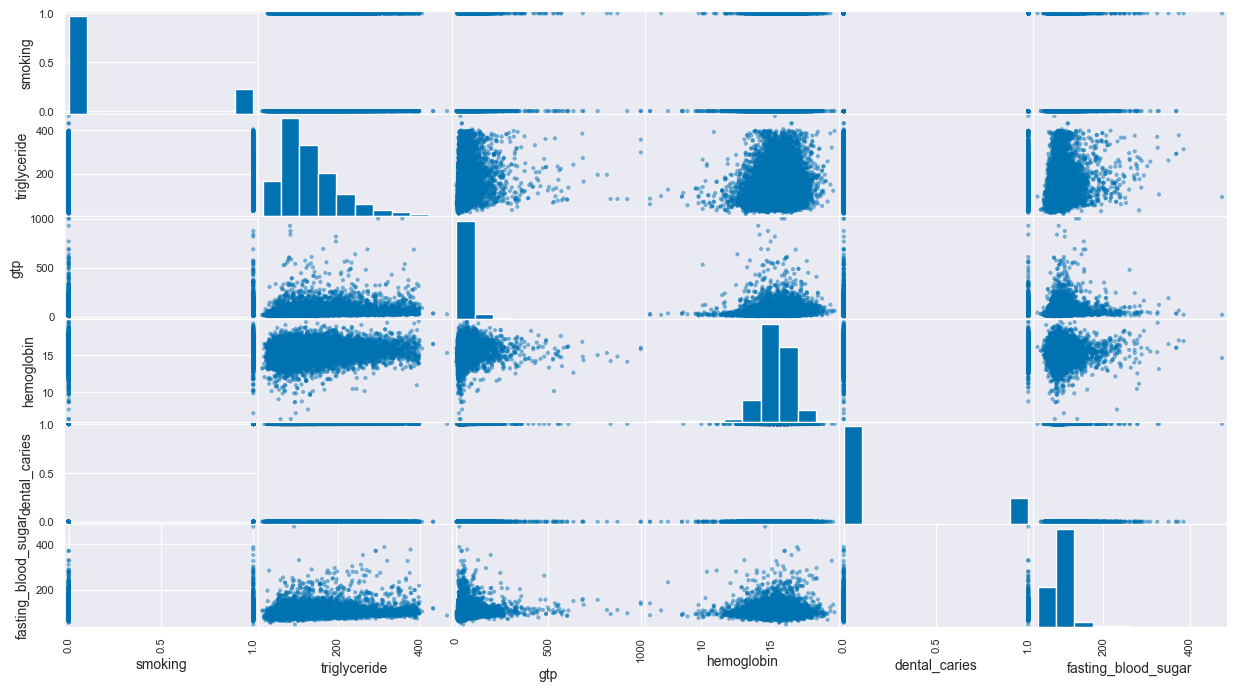

In [26]:
attributes = ['smoking', 'triglyceride', 'gtp', 'hemoglobin', 'dental_caries', 'fasting_blood_sugar']
pd.plotting.scatter_matrix(df[attributes], figsize=(15, 8))
plt.show()

Оценю зависимости на графике heatmap

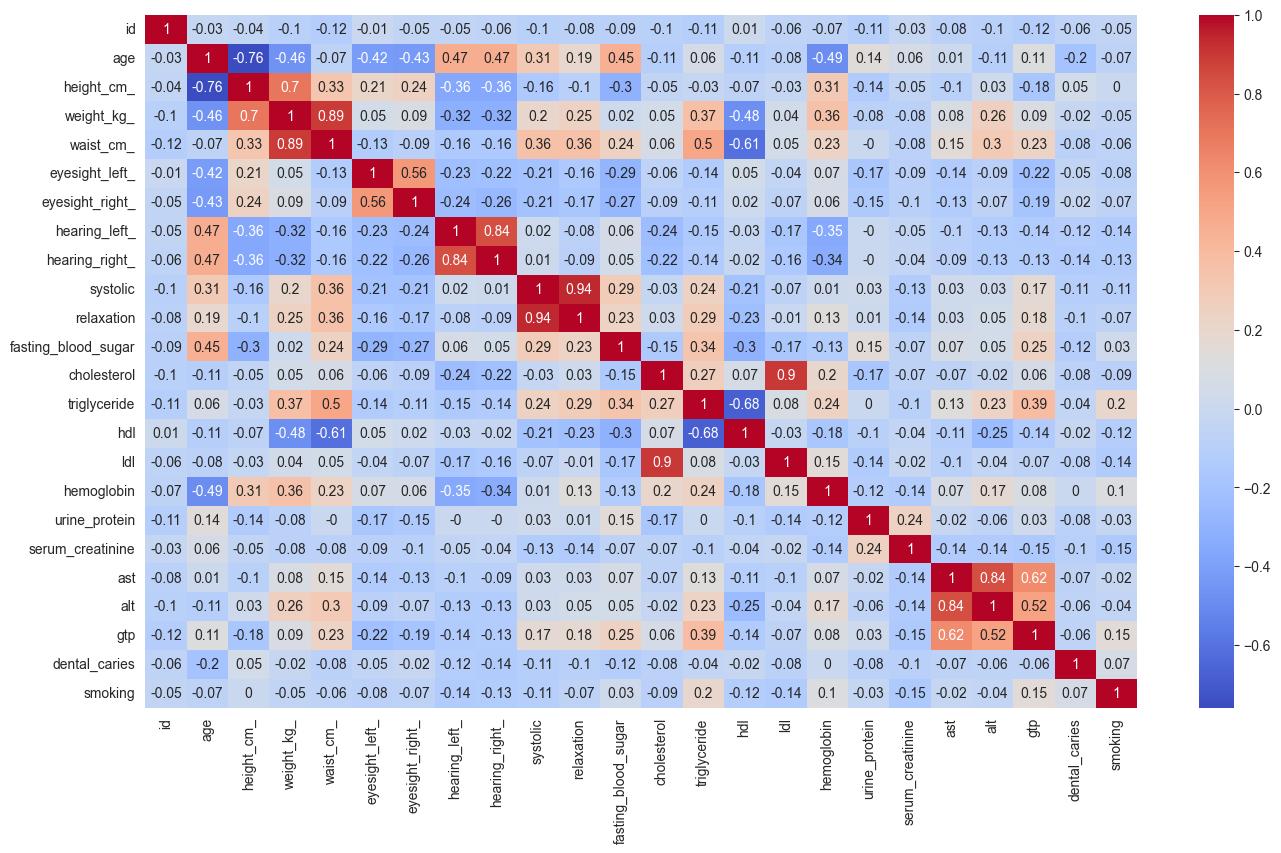

In [27]:
plt.figure(figsize=(16, 9))
sns.heatmap(round(corr_matrix.corr(), 2), annot=True, cmap='coolwarm')
plt.show()

Проверка смарт корреляцией. Помогает найти мультиколлинеарность в колонках

In [28]:
correlated = SmartCorrelatedSelection(
    variables=None,
    method='pearson',
    threshold=0.8,
    missing_values='ignore',
    selection_method='variance',
    estimator=None,
    scoring='roc_auc',
    cv=5)

correlated.fit(df)

SmartCorrelatedSelection(cv=5, selection_method='variance')

Смарт корреляция не рекомендует каких либо признаков к дропу

In [29]:
correlated.features_to_drop_

[]

## 5.3 Количественные признаки

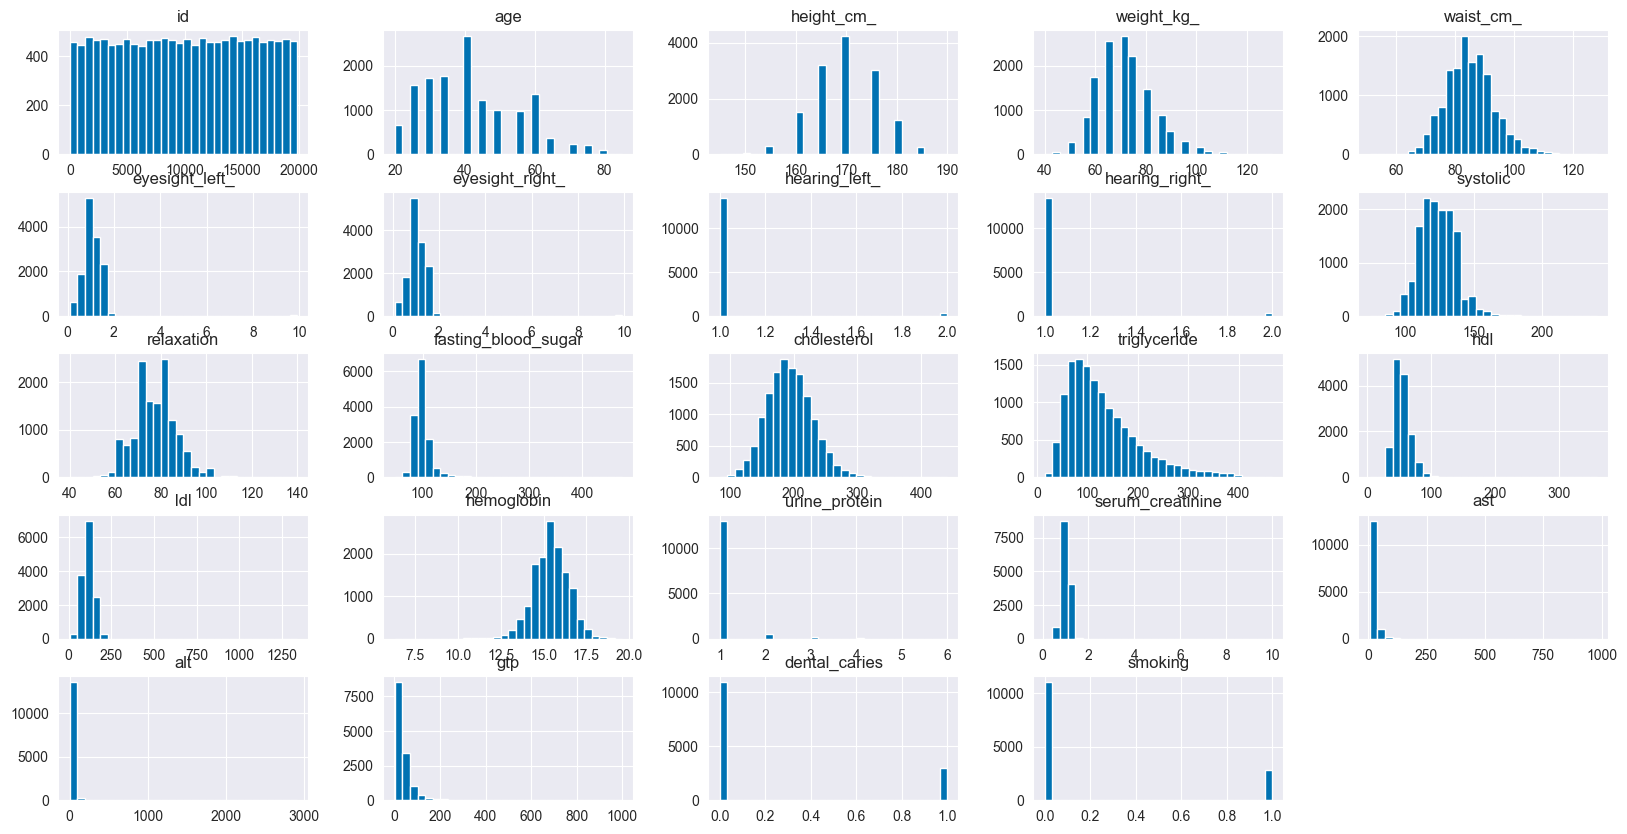

In [30]:
df.hist(figsize=(20, 10), bins=30, legend=False);
plt.show()

#### Функция гистограммы и описания для количественных признаков

In [31]:
def hist_box_describe_num(ds, x):
    print(ds[x].describe())
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=ds, x=ds[x], kde=True);
    plt.subplot(1, 2, 2)
    sns.boxplot(data=ds, y=ds[x]);

### Smoking - Распределение курильшиков

Бинарный признак

In [32]:
df.smoking.value_counts()

smoking
0    11063
1     2800
Name: count, dtype: int64

Курильшиков ≈ 20% в обучающей выборке

### Age - возраст

count    13863.000000
mean        41.743851
std         13.624383
min         20.000000
25%         30.000000
50%         40.000000
75%         50.000000
max         85.000000
Name: age, dtype: float64


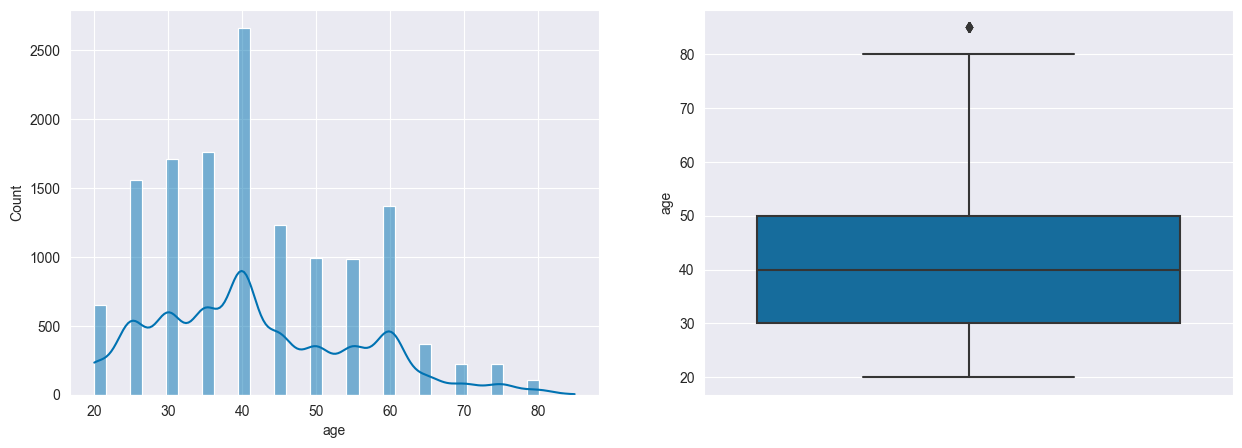

In [33]:
hist_box_describe_num(df, 'age')

Половина людей от 30 до 50 лет.
Сравню с графиком курящих людей.

In [34]:
df_copy.groupby('age').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
age,,
40,2662,0.276108
45,1235,0.273684
50,995,0.257286
55,988,0.210526
35,1765,0.171671
20,654,0.171254
60,1369,0.168736
25,1558,0.165597
30,1711,0.163647


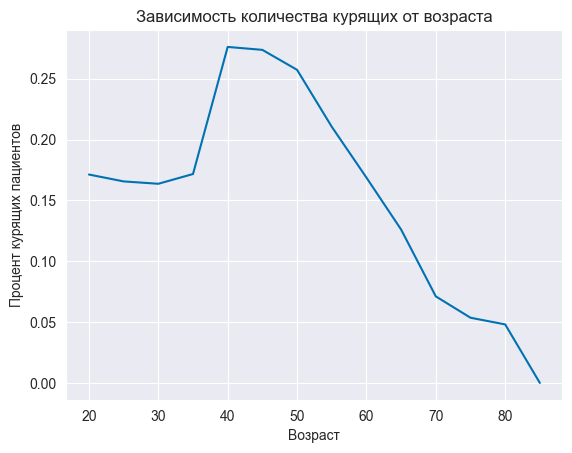

In [35]:
df_copy.groupby('age').smoking.mean().plot()
plt.title('Зависимость количества курящих от возраста')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Возраст');

**ЕСТЬ зависимость курения от возраста**
Больше всего людей курят в возрасте от 35 до 55 лет.

### Height - рост

count    13863.000000
mean       169.618409
std          6.493959
min        145.000000
25%        165.000000
50%        170.000000
75%        175.000000
max        190.000000
Name: height_cm_, dtype: float64


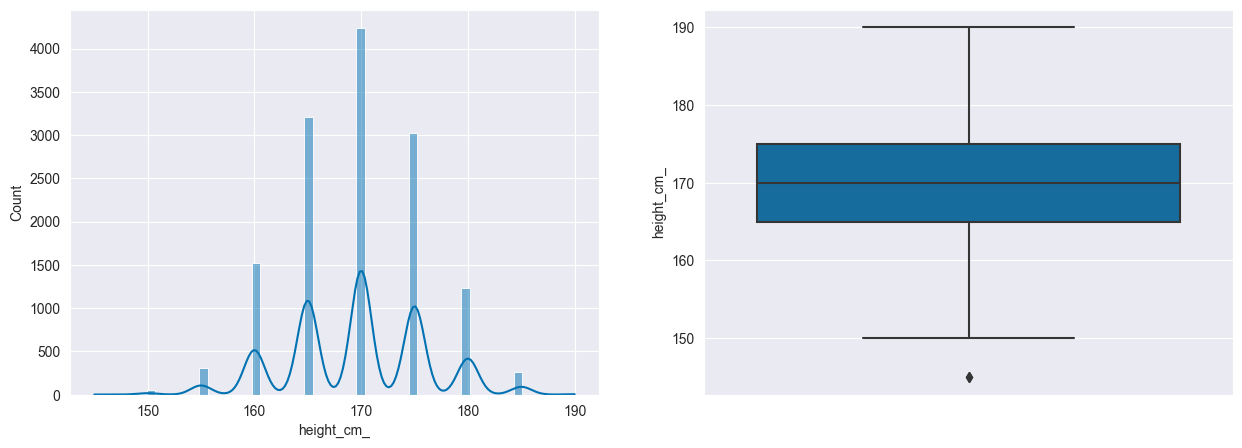

In [36]:
hist_box_describe_num(df, 'height_cm_')

Половина пациентов имеют рост от 165 до 175

In [37]:
df_copy.groupby('height_cm_').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
height_cm_,,
175,3021,0.222112
170,4238,0.211656
185,265,0.203774
180,1230,0.193496
165,3213,0.187986
150,48,0.187500
160,1521,0.184747
155,311,0.144695
190,14,0.071429


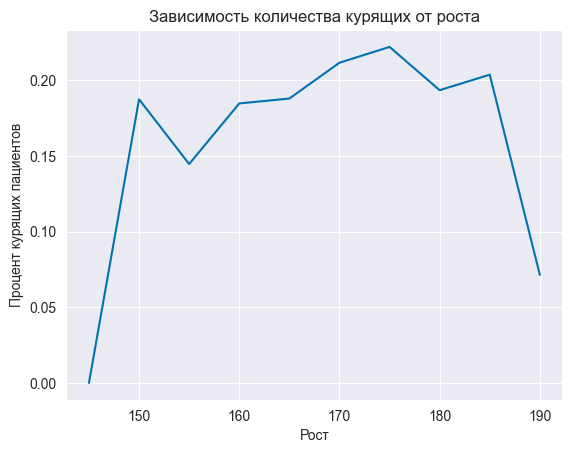

In [38]:
df_copy.groupby('height_cm_').smoking.mean().plot()
plt.title('Зависимость количества курящих от роста')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Рост');

**НЕТ прямой зависимости курения с ростом**

In [39]:
df.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


### Weight - Вес

count    13863.000000
mean        71.270288
std         11.195751
min         40.000000
25%         65.000000
50%         70.000000
75%         80.000000
max        130.000000
Name: weight_kg_, dtype: float64


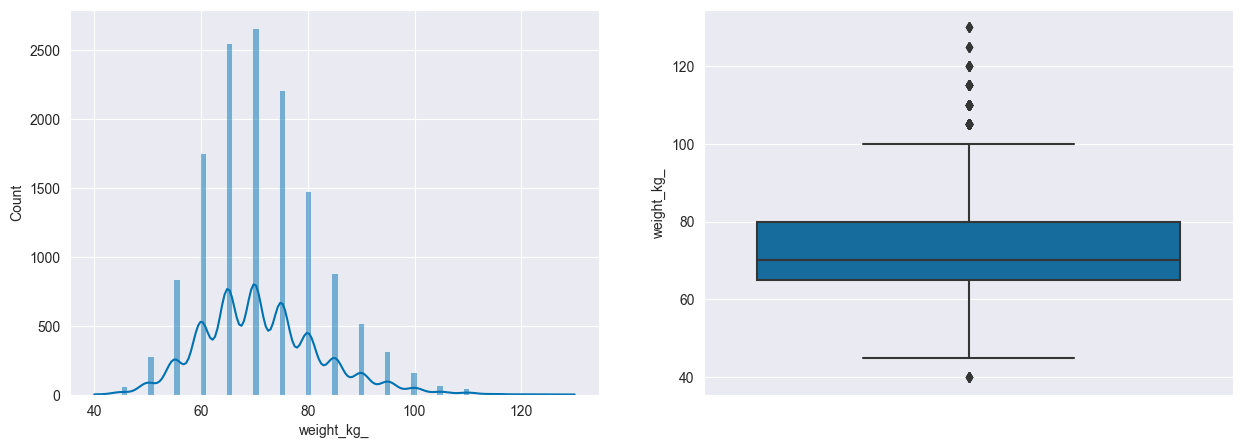

In [40]:
hist_box_describe_num(df, 'weight_kg_')

Половина пациентов имеют вес от 65 до 80 кг.
Для удобства сгруппирую пациентов по весу:

In [41]:
df_copy['weight_kg_group'] = pd.qcut(df_copy['weight_kg_'], 5)

In [42]:
df_copy.groupby('weight_kg_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
weight_kg_group,,
"(80.0, 130.0]",2018,0.230426
"(75.0, 80.0]",1481,0.206617
"(39.999, 60.0]",2941,0.201632
"(60.0, 70.0]",5211,0.195548
"(70.0, 75.0]",2212,0.188517


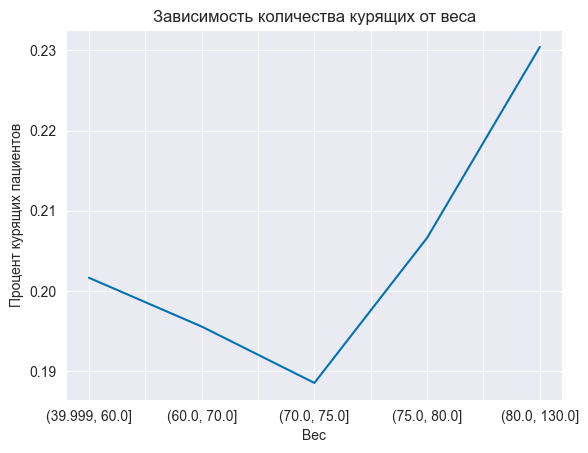

In [43]:
df_copy.groupby('weight_kg_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от веса')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Вес');

**ЕСТЬ зависимость курения с весом**
Люди с бОльшим весом чаще курят

### Waist - окружность талии

count    13863.000000
mean        84.870627
std          8.194957
min         51.000000
25%         79.200000
50%         84.400000
75%         90.000000
max        128.000000
Name: waist_cm_, dtype: float64


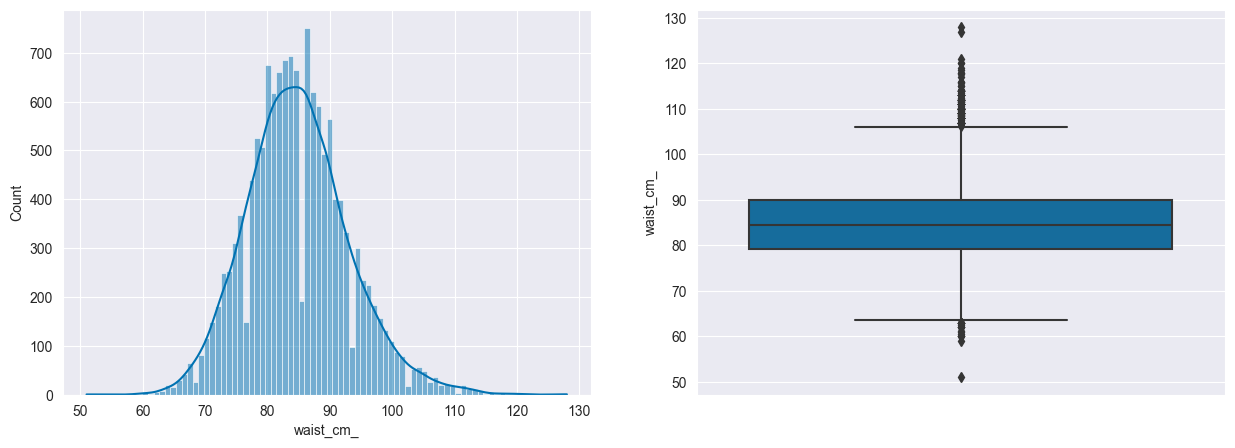

In [44]:
hist_box_describe_num(df, 'waist_cm_')

У половины пациентов окружность талии составляет от 79 до 90 см
**Выбросы в сравнении с тестовой выборкой:** Всего: 2 пациента > 120
Сгруппирую людей по окружности талии:

In [45]:
df_copy['waist_cm_group'] = pd.qcut(df_copy['waist_cm_'], 5)

In [46]:
df_copy.groupby('waist_cm_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
waist_cm_group,,
"(91.0, 128.0]",2738,0.223521
"(50.999, 78.0]",2887,0.204364
"(86.2, 91.0]",2802,0.203426
"(78.0, 82.5]",2728,0.189883
"(82.5, 86.2]",2708,0.188331


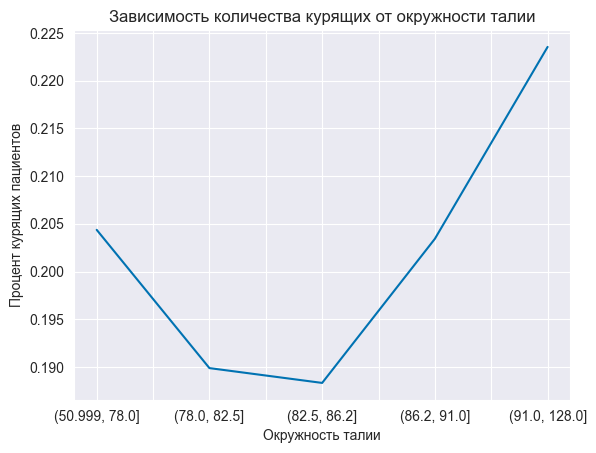

In [47]:
df_copy.groupby('waist_cm_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от окружности талии')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Окружность талии');

**Есть зависимость курения с окружностью талии**
Люди с бОльшей окружностью талии чаще курят.

### ID

Все id - уникальны

In [48]:
df.id.count(), df.id.nunique()

(13863, 13863)

### Eyesight left - зрение левого глаза

count    13863.000000
mean         1.057304
std          0.514618
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          9.900000
Name: eyesight_left_, dtype: float64


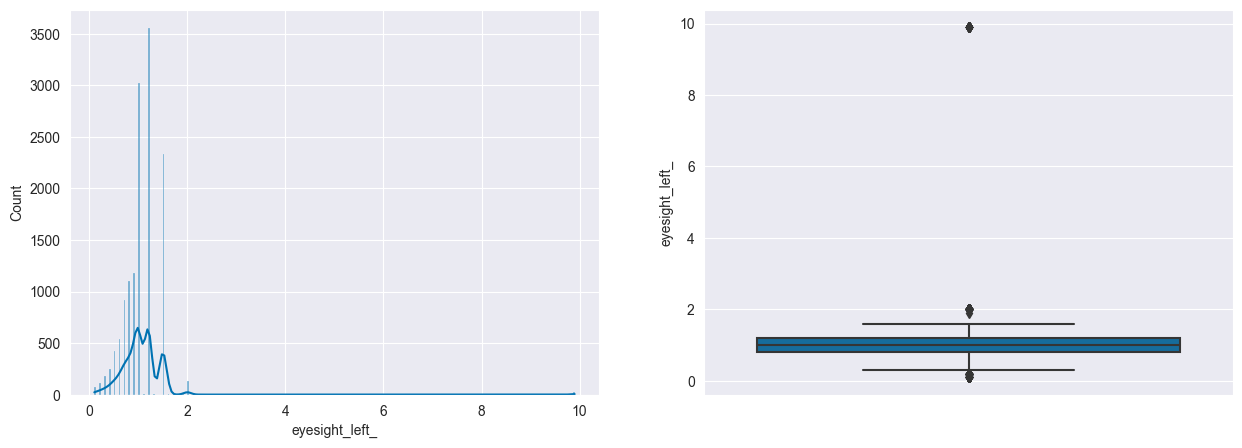

In [49]:
hist_box_describe_num(df, 'eyesight_left_')

Есть выбросы максимальных значений - 28, что составляет ≈0.2% от обучающей выборки
В тестовой выборке похожие выбросы

Сгруппирую людей по зрению левого глаза:

In [50]:
df_copy['eyesight_left_group'] = pd.qcut(df_copy['eyesight_left_'], 5, duplicates='drop')

In [51]:
df_copy.groupby('eyesight_left_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
eyesight_left_group,,
"(1.0, 1.2]",3559,0.203428
"(0.099, 0.8]",3590,0.202786
"(0.8, 1.0]",4210,0.201425
"(1.2, 9.9]",2504,0.199681


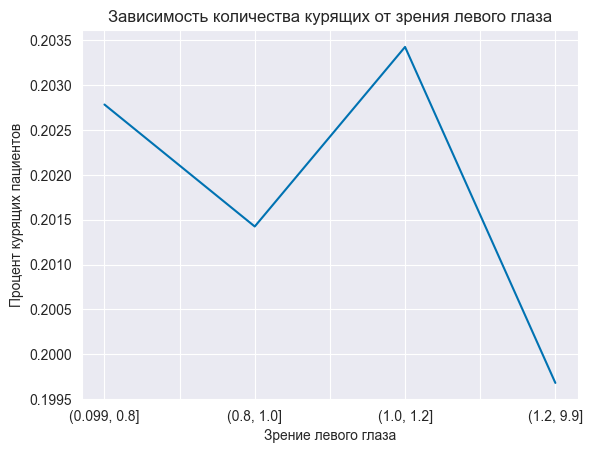

In [52]:
df_copy.groupby('eyesight_left_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от зрения левого глаза')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Зрение левого глаза');

**НЕТ прямой зависимости курения со зрением левого глаза**

### Eyesight right - зрение правого глаза

count    13863.000000
mean         1.053740
std          0.514613
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          9.900000
Name: eyesight_right_, dtype: float64


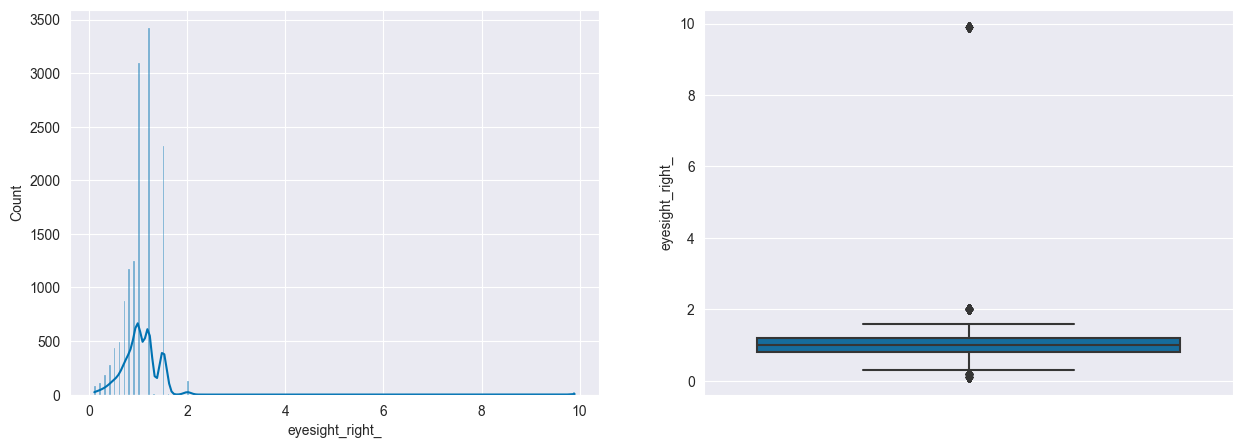

In [53]:
hist_box_describe_num(df, 'eyesight_right_')

Есть выбросы максимальных значений - 28, что составляет ≈0.2% от обучающей выборки
В тестовой выборке похожие выбросы

Сгруппирую людей по зрению левого глаза:

In [54]:
df_copy['eyesight_right_group'] = pd.qcut(df_copy['eyesight_right_'], 5, duplicates='drop')

In [55]:
df_copy.groupby('eyesight_right_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
eyesight_right_group,,
"(1.2, 9.9]",2485,0.207243
"(0.8, 1.0]",4345,0.201841
"(0.099, 0.8]",3611,0.201606
"(1.0, 1.2]",3422,0.198714


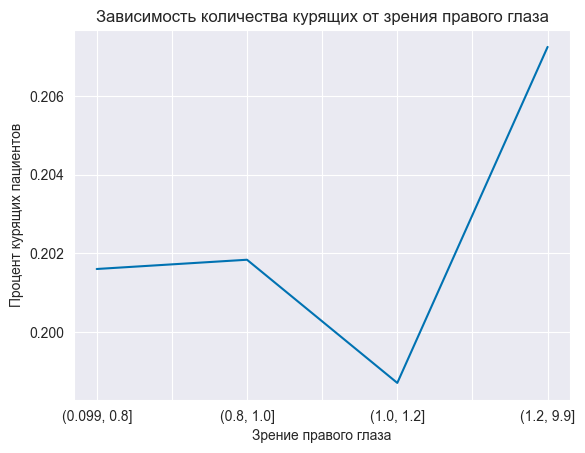

In [56]:
df_copy.groupby('eyesight_right_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от зрения правого глаза')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Зрение правого глаза');

**НЕТ прямой зависимости курения со зрением правого глаза**

### Hearing left - слышимость левого уха

Бинарный признак

In [57]:
df.hearing_left_.value_counts()

hearing_left_
1.0    13474
2.0      389
Name: count, dtype: int64

У ≈2.8% пациентов не слышит левое ухо

In [58]:
df_copy.groupby('hearing_left_').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
hearing_left_,,
1.0,13474,0.203651
2.0,389,0.143959


**НЕТ прямой зависимости, так как мало данных**

### Hearing right - слышимость правого уха

Бинарный признак

In [59]:
df.hearing_right_.value_counts()

hearing_right_
1.0    13483
2.0      380
Name: count, dtype: int64

У ≈2.7% пациентов не слышит правое ухо

In [60]:
df_copy.groupby('hearing_right_').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
hearing_right_,,
1.0,13483,0.203219
2.0,380,0.157895


**НЕТ прямой зависимости курения, так как мало данных**

### Systolic - систолическое давление

count    13863.000000
mean       123.430643
std         12.964684
min         74.000000
25%        115.000000
50%        122.000000
75%        131.000000
max        240.000000
Name: systolic, dtype: float64


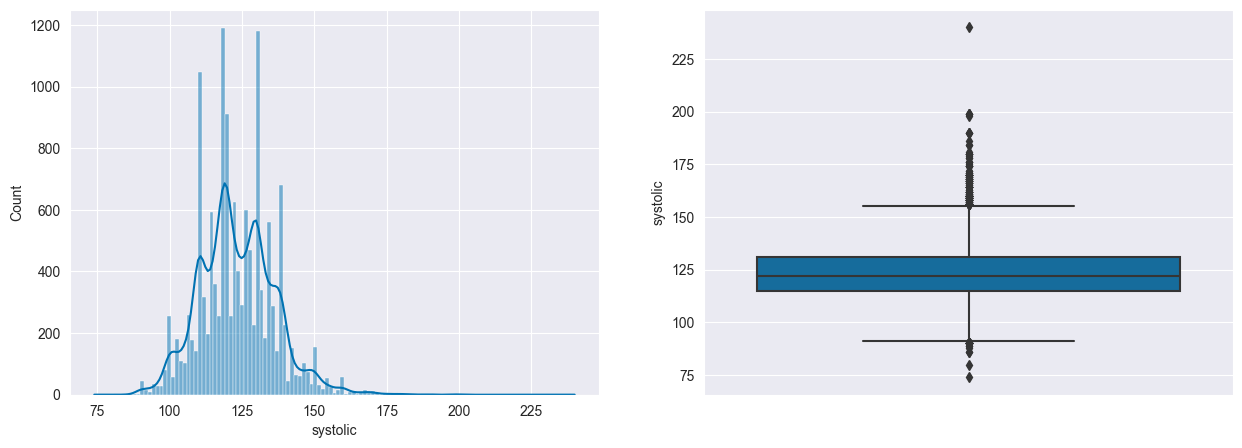

In [61]:
hist_box_describe_num(df, 'systolic')

У половины пациентов систолическое давление находится в пределах от 115 до 131
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 3 пациента: - 1 пациент > 200, 2 пациента < 85

Сгруппирую людей по систолическому давлению:

In [62]:
df_copy['systolic_group'] = pd.qcut(df_copy['systolic'], 5, duplicates='drop')

In [63]:
df_copy.groupby('systolic_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
systolic_group,,
"(112.0, 120.0]",3508,0.206385
"(120.0, 126.0]",1918,0.203858
"(126.0, 134.0]",2948,0.203528
"(73.999, 112.0]",2895,0.200691
"(134.0, 240.0]",2594,0.194295


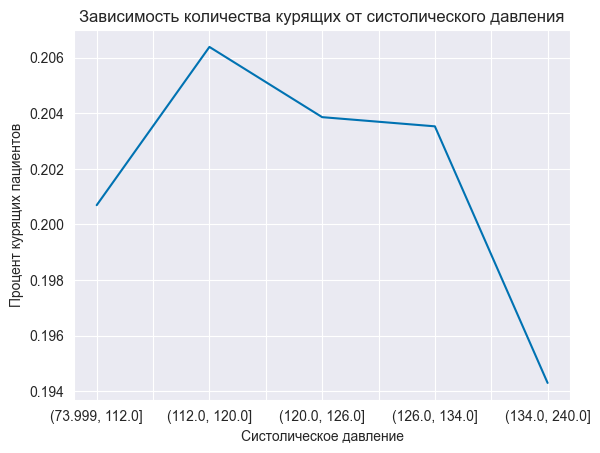

In [64]:
df_copy.groupby('systolic_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от систолического давления')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Систолическое давление');

**НЕТ прямой зависимости курения с систолическим давлением**

### Relaxation - диастолическое давление

count    13863.000000
mean        77.166703
std          9.459288
min         40.000000
25%         70.000000
50%         78.000000
75%         83.000000
max        140.000000
Name: relaxation, dtype: float64


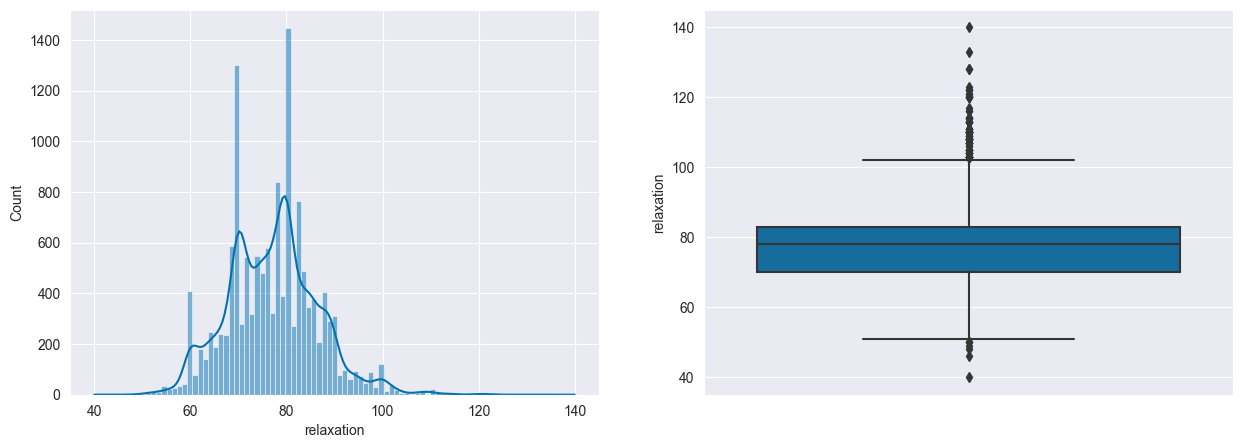

In [65]:
hist_box_describe_num(df, 'relaxation')

У половины пациентов диастолическое давление находится в пределах от 70 до 83
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента: 1 пациент > 133, 1 пациент < 45

Сгруппирую людей по диастолическому давлению:

In [66]:
df_copy['relaxation_group'] = pd.qcut(df_copy['relaxation'], 5, duplicates='drop')

In [67]:
df_copy.groupby('relaxation_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
relaxation_group,,
"(80.0, 85.0]",1873,0.214095
"(75.0, 80.0]",3578,0.211850
"(85.0, 140.0]",2451,0.207262
"(70.0, 75.0]",2167,0.190586
"(39.999, 70.0]",3794,0.189773


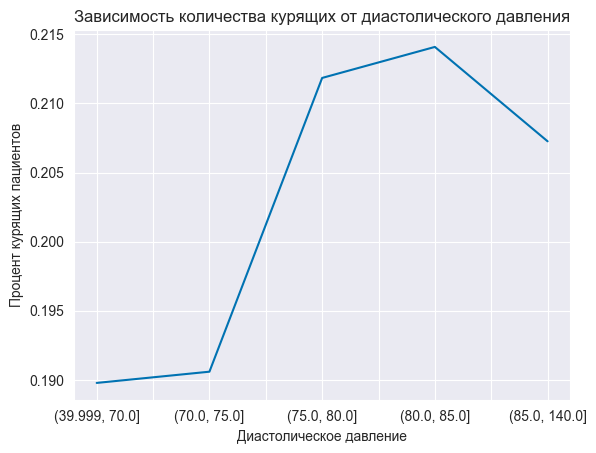

In [68]:
df_copy.groupby('relaxation_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от диастолического давления')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Диастолическое давление');

**Спорная зависимость курения с диастолическим давлением**
Люди с повышенным диастолическим давлением скорее курят чаще.


### Fasting blood sugar - Сахар в крови

count    13863.000000
mean        99.937387
std         20.682085
min         48.000000
25%         90.000000
50%         96.000000
75%        104.000000
max        475.000000
Name: fasting_blood_sugar, dtype: float64


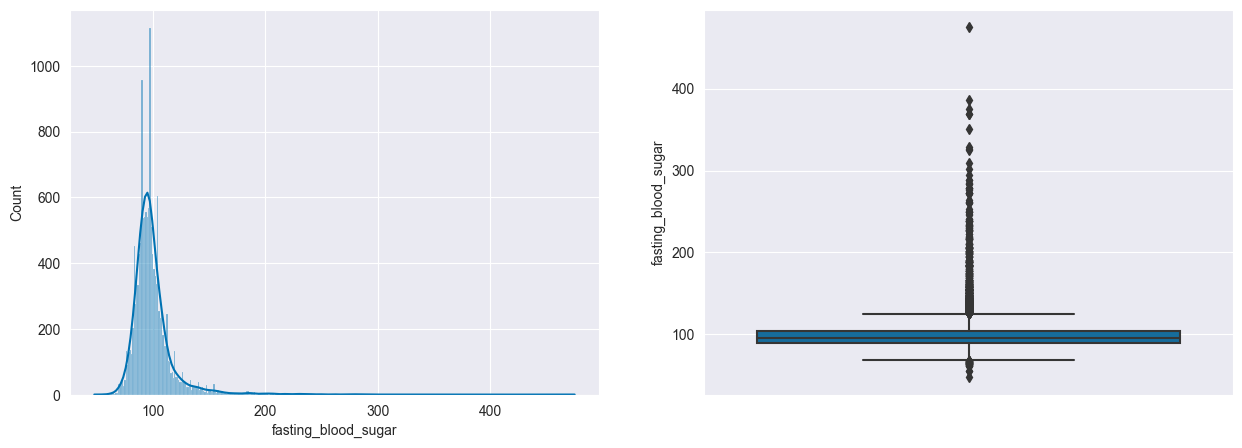

In [69]:
hist_box_describe_num(df, 'fasting_blood_sugar')

У половины пациентов сахар в крови находится в пределах от 90 до 104
**Выбросы в сравнении с тестовой выборкой:** Всего 2 пациента: 1 пациент > 450, 1 пациент < 50

Сгруппирую людей по сахару в крови:

In [70]:
df_copy['fasting_blood_sugar_group'] = pd.qcut(df_copy['fasting_blood_sugar'], 5, duplicates='drop')

In [71]:
df_copy.groupby('fasting_blood_sugar_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
fasting_blood_sugar_group,,
"(107.0, 475.0]",2595,0.232755
"(99.0, 107.0]",2595,0.214258
"(94.0, 99.0]",2733,0.192828
"(47.999, 88.0]",2888,0.190789
"(88.0, 94.0]",3052,0.184142


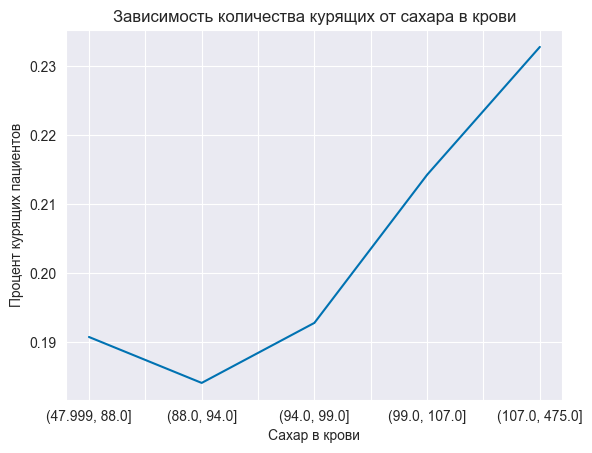

In [72]:
df_copy.groupby('fasting_blood_sugar_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от сахара в крови')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Сахар в крови');

**Есть зависимость курения с сахаром в крови**
Люди с повышенным сахаром в крови курят чаще.

### Cholesterol - холестерин

count    13863.000000
mean       193.864387
std         35.658783
min         84.000000
25%        169.000000
50%        192.000000
75%        216.000000
max        441.000000
Name: cholesterol, dtype: float64


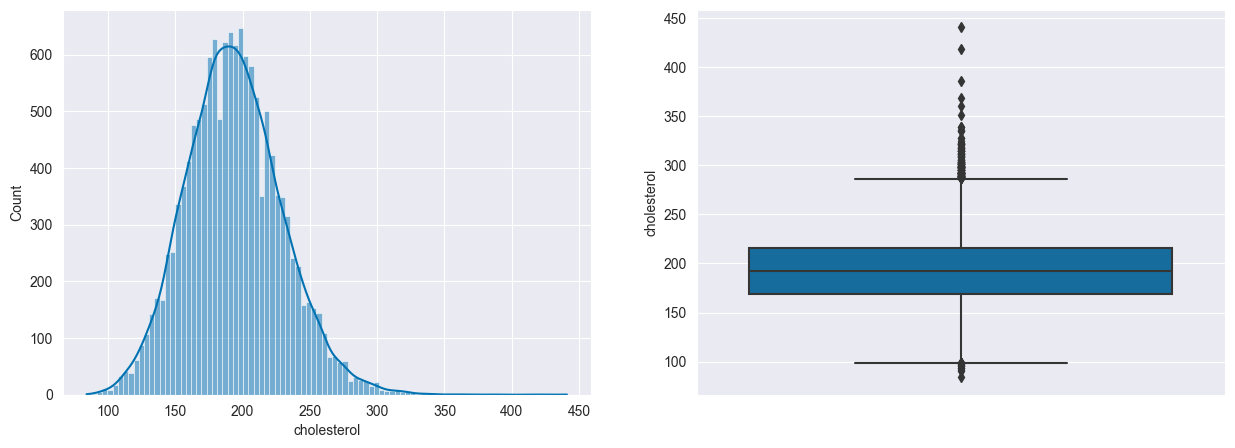

In [73]:
hist_box_describe_num(df, 'cholesterol')

У половины пациентов холестерин находится в пределах от 169 до 216
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента > 400,

Сгруппирую людей по холестерину:

In [74]:
df_copy['cholesterol_group'] = pd.qcut(df_copy['cholesterol'], 10, duplicates='drop')

In [75]:
df_copy.groupby('cholesterol_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
cholesterol_group,,
"(211.0, 222.0]",1311,0.222731
"(192.0, 201.0]",1434,0.214086
"(149.0, 164.0]",1462,0.213406
"(222.0, 240.0]",1424,0.208567
"(240.0, 441.0]",1339,0.197909
"(175.0, 184.0]",1443,0.194733
"(83.999, 149.0]",1392,0.194684
"(201.0, 211.0]",1399,0.194425
"(164.0, 175.0]",1396,0.193410


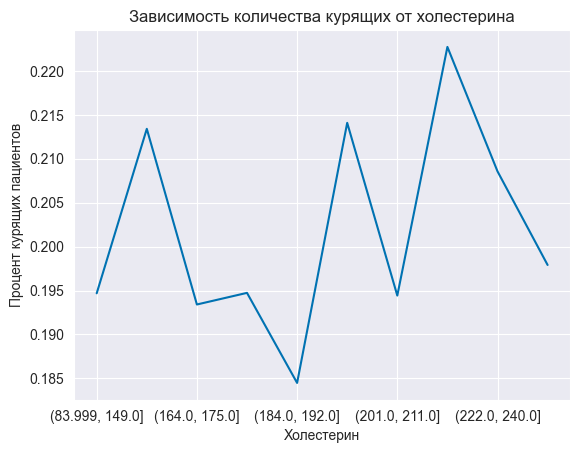

In [76]:
df_copy.groupby('cholesterol_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от холестерина')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Холестерин');

**НЕТ прямой зависимости курения с холестерином**

### Triglyceride - триглицерид

count    13863.000000
mean       130.917767
std         71.348298
min         16.000000
25%         78.000000
50%        113.000000
75%        166.000000
max        466.000000
Name: triglyceride, dtype: float64


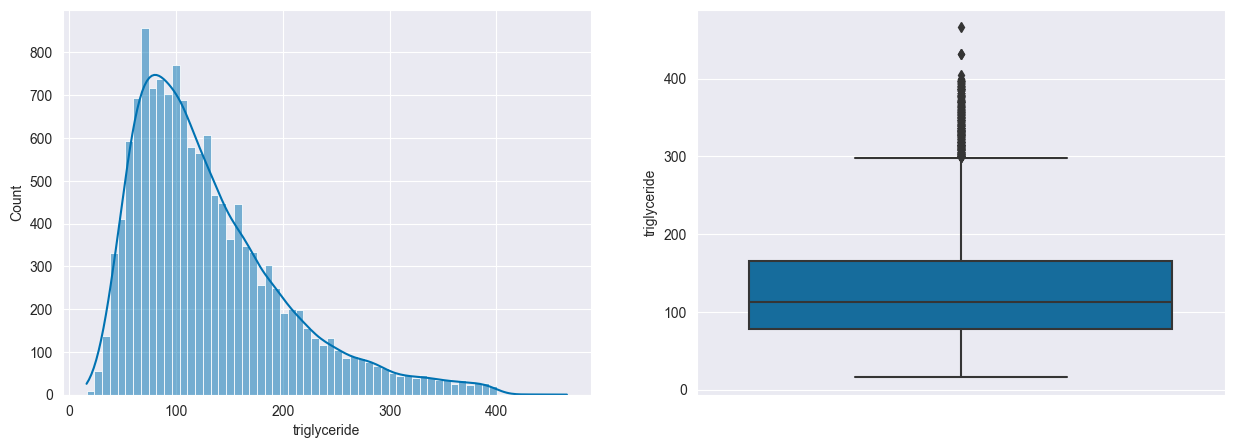

In [77]:
hist_box_describe_num(df, 'triglyceride')

У половины пациентов триглицерид находится в пределах от 78 до 166
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 6 пациентов < 20,

Сгруппирую людей по триглицериду:

In [78]:
df_copy['triglyceride_group'] = pd.qcut(df_copy['triglyceride'], 5, duplicates='drop')

In [79]:
df_copy.groupby('triglyceride_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
triglyceride_group,,
"(182.0, 466.0]",2747,0.296687
"(131.0, 182.0]",2751,0.226463
"(99.0, 131.0]",2745,0.206557
"(72.0, 99.0]",2755,0.165517
"(15.999, 72.0]",2865,0.118325


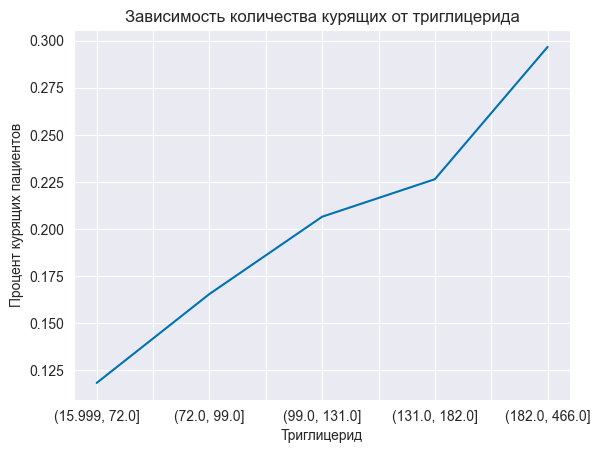

In [80]:
df_copy.groupby('triglyceride_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от триглицерида')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Триглицерид');

**ЕСТЬ прямая зависимость курения с триглицеридом**
Люди с повышенным триглициридом курят чаще

### HDL - холестерин липопротеинов высокой плотности

count    13863.000000
mean        54.204357
std         13.168432
min          4.000000
25%         45.000000
50%         53.000000
75%         61.000000
max        359.000000
Name: hdl, dtype: float64


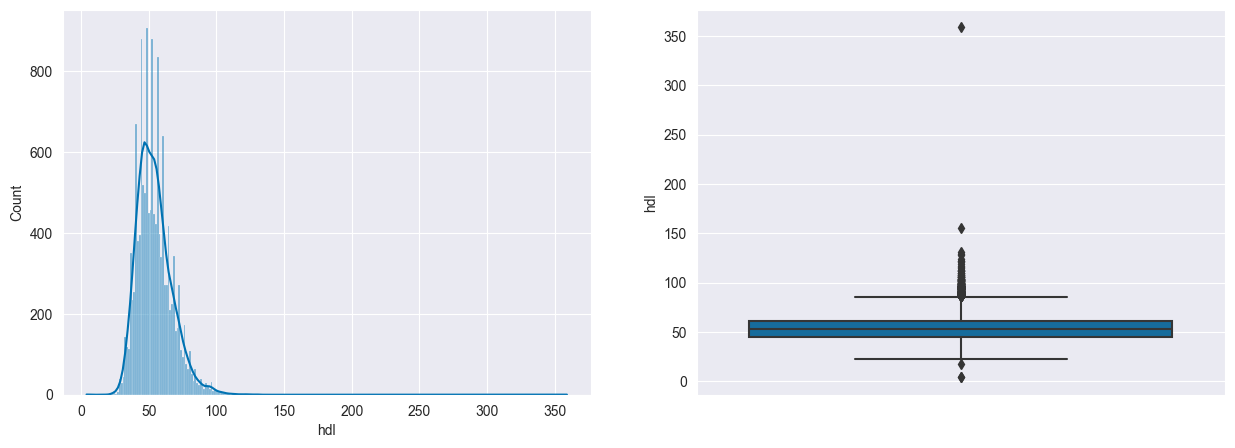

In [81]:
hist_box_describe_num(df, 'hdl')

У половины пациентов холестерин липопротеинов находится в пределах от 45 до 61
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 4 пациента: 1 пациент > 160, 3 пациента < 20,

Сгруппирую людей по HDL:

In [82]:
df_copy['hdl_group'] = pd.qcut(df_copy['hdl'], 5, duplicates='drop')

In [83]:
df_copy.groupby('hdl_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
hdl_group,,
"(3.999, 43.0]",2795,0.236852
"(43.0, 49.0]",2801,0.218850
"(49.0, 56.0]",3106,0.189955
"(56.0, 64.0]",2504,0.187700
"(64.0, 359.0]",2657,0.175009


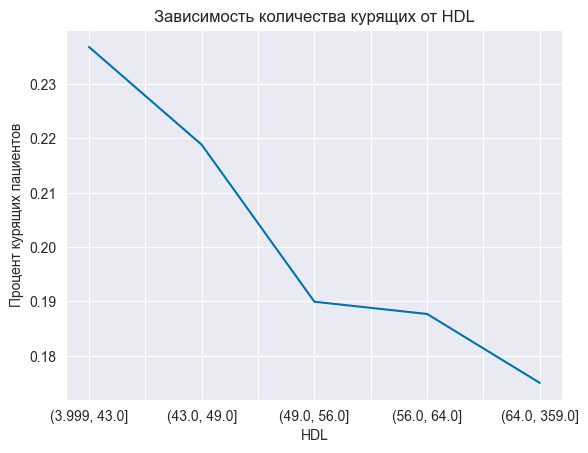

In [84]:
df_copy.groupby('hdl_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от HDL')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('HDL');

**ЕСТЬ прямая зависимость курения с HDL**
Люди с пониженным HDL курят чаще

### LDL - липопротеины низкой плотности

count    13863.000000
mean       114.435476
std         42.050428
min          7.000000
25%         91.000000
50%        113.000000
75%        135.000000
max       1340.000000
Name: ldl, dtype: float64


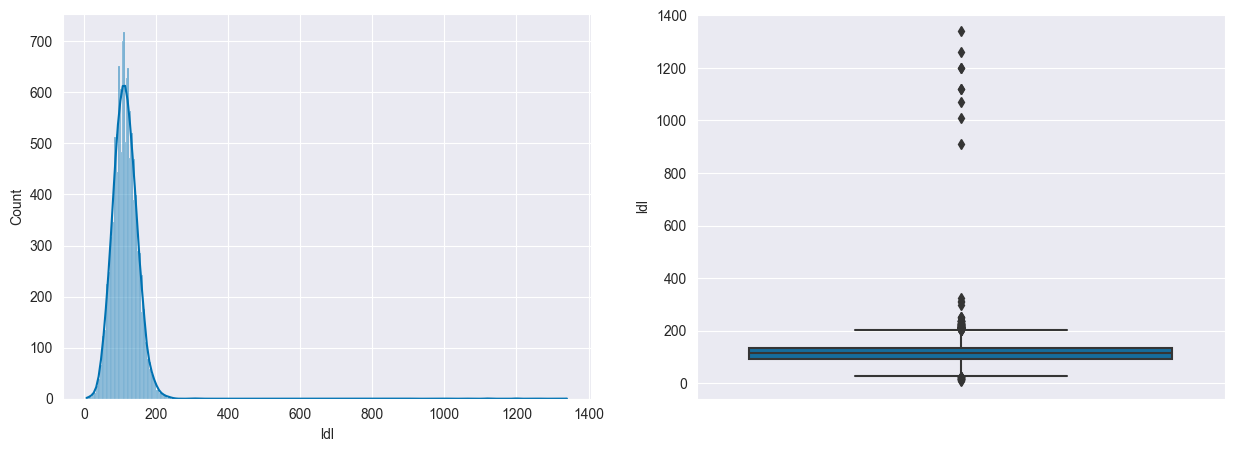

In [85]:
hist_box_describe_num(df, 'ldl')

У половины пациентов липопротеины находится в пределах от 91 до 135
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 9 пациентов: 6 пациентов > 1100, 3 пациента < 20,

Сгруппирую людей по LDL:

In [86]:
df_copy['ldl_group'] = pd.qcut(df_copy['ldl'], 5, duplicates='drop')

In [87]:
df_copy.groupby('ldl_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
ldl_group,,
"(6.999, 86.0]",2843,0.232853
"(86.0, 105.0]",2836,0.202045
"(105.0, 121.0]",2733,0.199049
"(121.0, 141.0]",2779,0.191796
"(141.0, 1340.0]",2672,0.182635


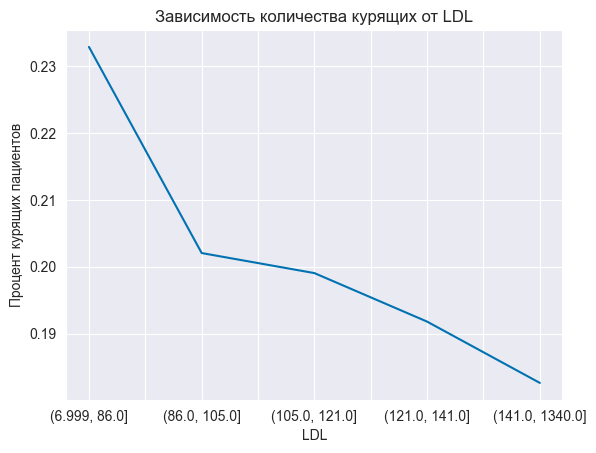

In [88]:
df_copy.groupby('ldl_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от LDL')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('LDL');

**ЕСТЬ прямая зависимость курения с LDL**
Люди с пониженным LDL курят чаще

### Hemoglobin - гемоглобин

count    13863.000000
mean        15.402200
std          1.052598
min          6.300000
25%         14.800000
50%         15.400000
75%         16.100000
max         19.600000
Name: hemoglobin, dtype: float64


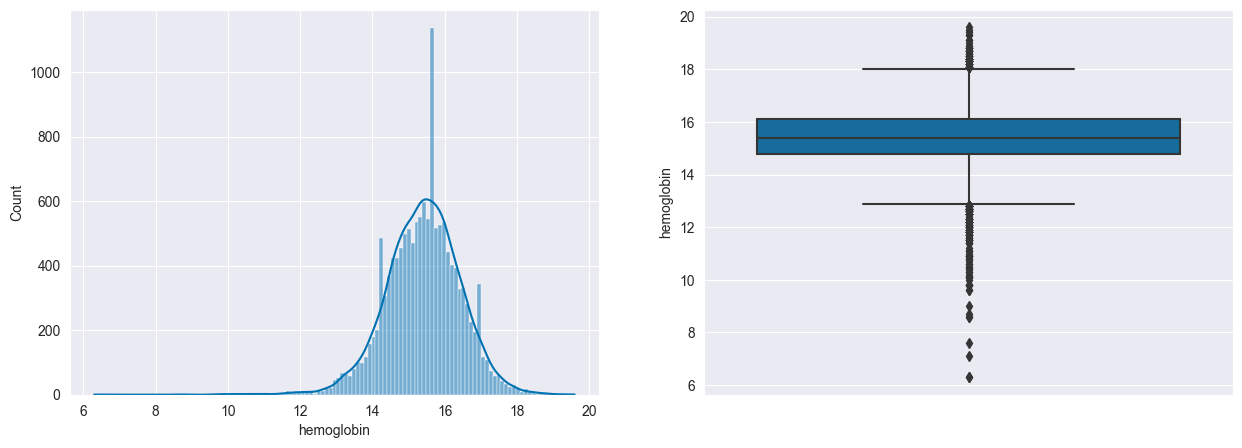

In [89]:
hist_box_describe_num(df, 'hemoglobin')

У половины пациентов гемоглобин находится в пределах от 14.8 до 16.1
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 9 пациентов: 3 пациента > 19.4, 6 пациентов < 8.6,

Сгруппирую людей по гемоглобину:

In [90]:
df_copy['hemoglobin_group'] = pd.qcut(df_copy['hemoglobin'], 5, duplicates='drop')

In [91]:
df_copy.groupby('hemoglobin_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
hemoglobin_group,,
"(16.2, 19.6]",2734,0.260790
"(15.7, 16.2]",2425,0.213196
"(15.2, 15.7]",2830,0.196820
"(14.6, 15.2]",2895,0.175820
"(6.2989999999999995, 14.6]",2979,0.169184


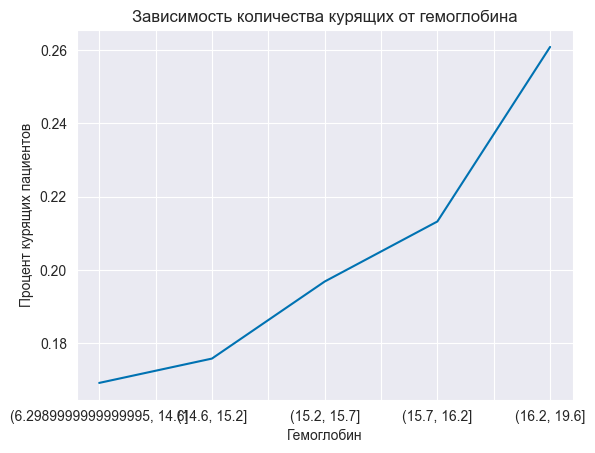

In [92]:
df_copy.groupby('hemoglobin_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от гемоглобина')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Гемоглобин');

**ЕСТЬ прямая зависимость курения с гемоглобином**
Люди с повышенным гемоглобином курят чаще

### Urine protein - белок в моче

count    13863.000000
mean         1.093775
std          0.421272
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: urine_protein, dtype: float64


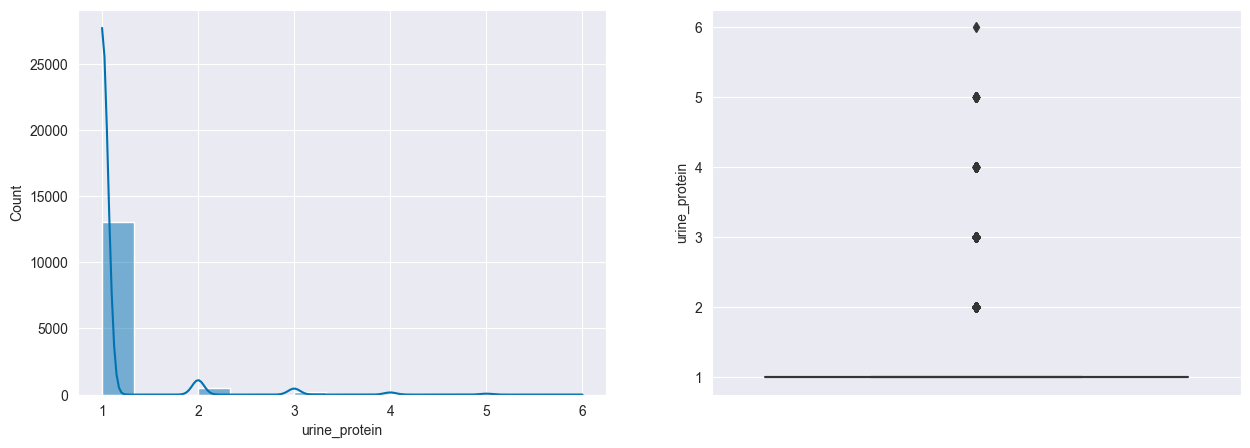

In [93]:
hist_box_describe_num(df, 'urine_protein')

In [94]:
df_copy.groupby('urine_protein').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
urine_protein,,
6.0,1,1.000000
4.0,75,0.266667
3.0,214,0.238318
2.0,514,0.235409
5.0,32,0.218750
1.0,13027,0.199585


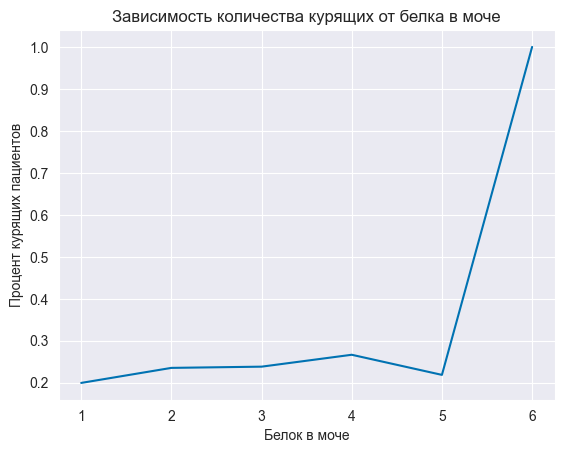

In [95]:
df_copy.groupby('urine_protein').smoking.mean().plot()
plt.title('Зависимость количества курящих от белка в моче')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Белок в моче');

**Спорная зависимость курения с белком в моче**
У абсолютного большинства людей белок в моче равен единице, в остальных случаях вероятность курения немного выше.

### Serum creatinine - Сывороточный креатинин

count    13863.000000
mean         0.981808
std          0.240337
min          0.100000
25%          0.900000
50%          1.000000
75%          1.100000
max         10.000000
Name: serum_creatinine, dtype: float64


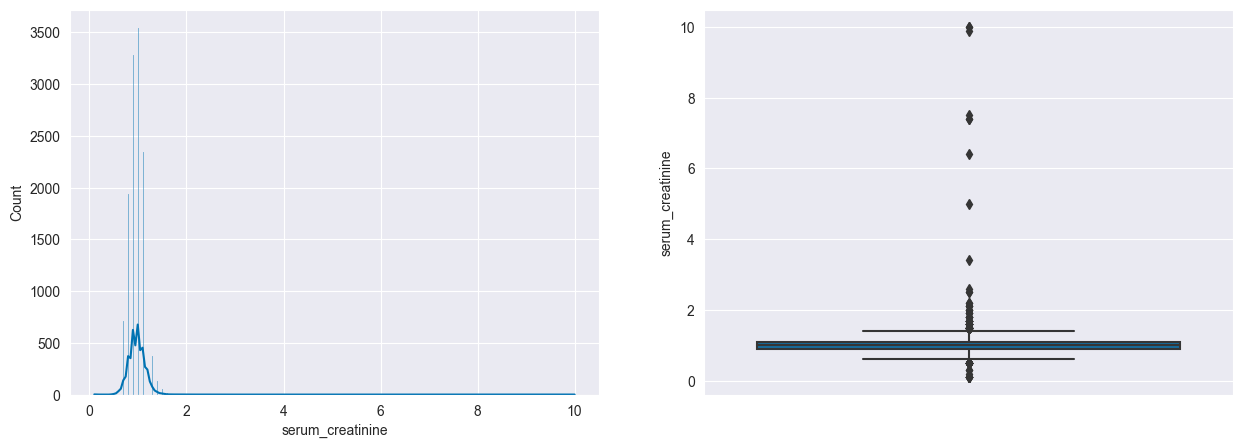

In [96]:
hist_box_describe_num(df, 'serum_creatinine')

У половины пациентов сывороточный креатинин находится в пределах от 0.9 до 1.1
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 10 пациентов > 2.6

Сгруппирую людей по сывороточному креатинину:

In [97]:
df_copy['serum_creatinine_group'] = pd.qcut(df_copy['serum_creatinine'], 5, duplicates='drop')

In [98]:
df_copy.groupby('serum_creatinine_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
serum_creatinine_group,,
"(0.099, 0.8]",2852,0.233170
"(0.8, 0.9]",3279,0.213480
"(0.9, 1.0]",3544,0.199492
"(1.0, 1.1]",2340,0.185043
"(1.1, 10.0]",1848,0.159632


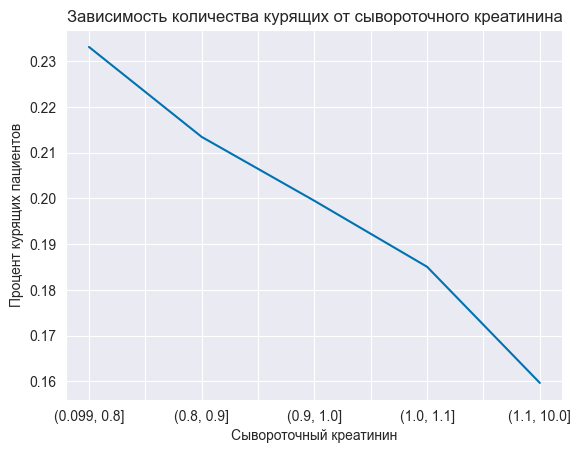

In [99]:
df_copy.groupby('serum_creatinine_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от сывороточного креатинина')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Сывороточный креатинин');

**ЕСТЬ прямая зависимость курения с сывороточным кретинином**
Люди с пониженным сывороточным кретинином курят чаще

### AST - Аспартатаминотрансфераз

count    13863.000000
mean        27.597562
std         21.559820
min          7.000000
25%         20.000000
50%         24.000000
75%         30.000000
max        981.000000
Name: ast, dtype: float64


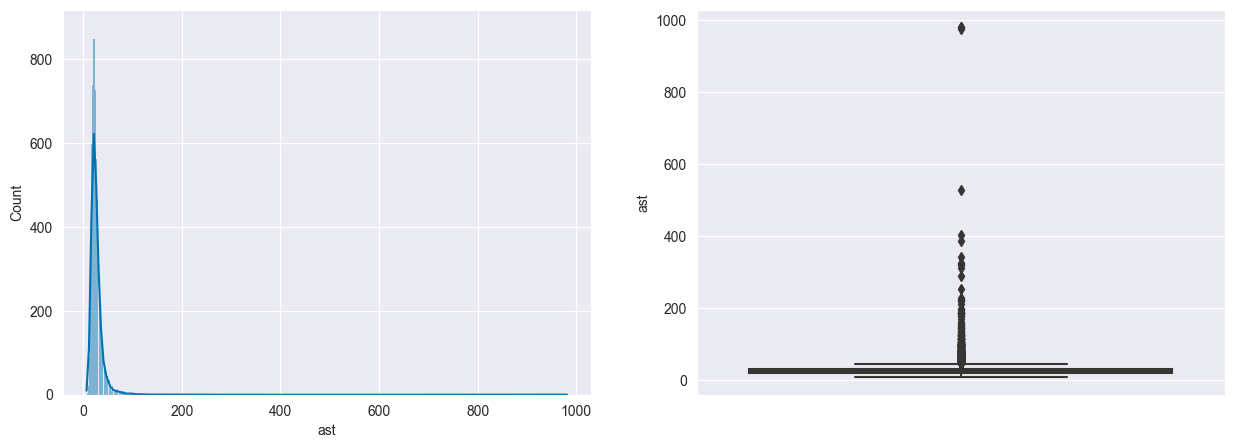

In [100]:
hist_box_describe_num(df, 'ast')

У половины пациентов Аспартатаминотрансфераз находится в пределах от 20 до 30
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 4 пациента: 3 пациента > 600, 1 пациент < 9

Сгруппирую людей по AST:

In [101]:
df_copy['ast_group'] = pd.qcut(df_copy['ast'], 5, duplicates='drop')

In [102]:
df_copy.groupby('ast_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
ast_group,,
"(32.0, 981.0]",2600,0.215769
"(6.999, 19.0]",3070,0.203909
"(26.0, 32.0]",2605,0.201536
"(22.0, 26.0]",2995,0.195326
"(19.0, 22.0]",2593,0.193984


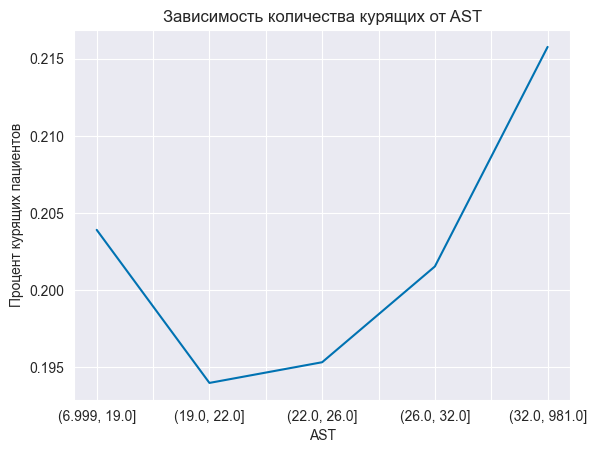

In [103]:
df_copy.groupby('ast_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от AST')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('AST');

**Спорная зависимость курения с AST**
Люди с повышенным AST скорее курят чаще

### ALT - Аланинаминотрансфераза

count    13863.000000
mean        30.772921
std         36.441688
min          2.000000
25%         18.000000
50%         24.000000
75%         35.000000
max       2914.000000
Name: alt, dtype: float64


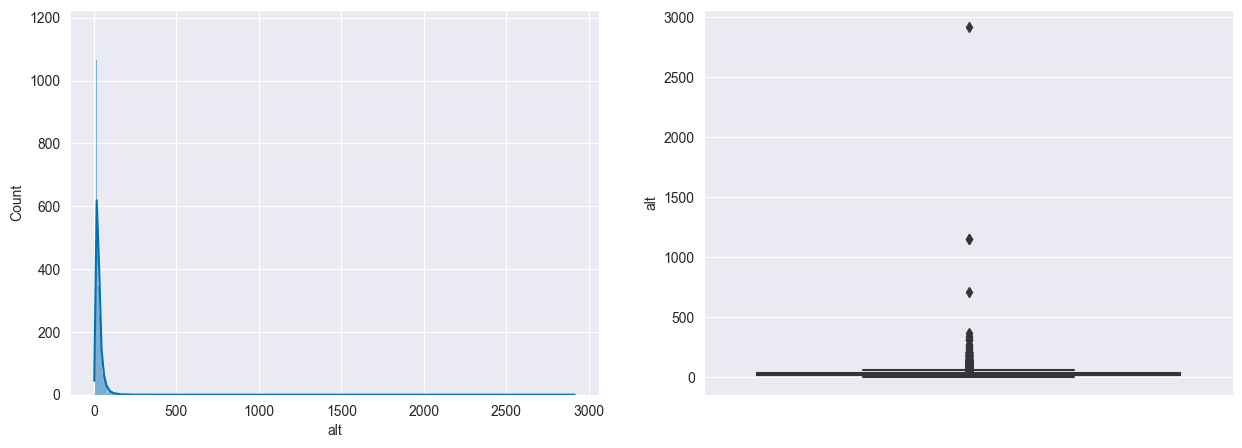

In [104]:
hist_box_describe_num(df, 'alt')

У половины пациентов Аланинаминотрансфераза находится в пределах от 18 до 35
**Выбросы в сравнении с тестовой выборкой:** Всего 3 пациента: 1 пациент > 1600, 2 пациента < 4

Сгруппирую людей по ALT:

In [105]:
df_copy['alt_group'] = pd.qcut(df_copy['alt'], 5, duplicates='drop')

In [106]:
df_copy.groupby('alt_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
alt_group,,
"(39.0, 2914.0]",2677,0.221890
"(27.0, 39.0]",2832,0.207627
"(1.999, 17.0]",3380,0.200592
"(21.0, 27.0]",2645,0.200000
"(17.0, 21.0]",2329,0.176471


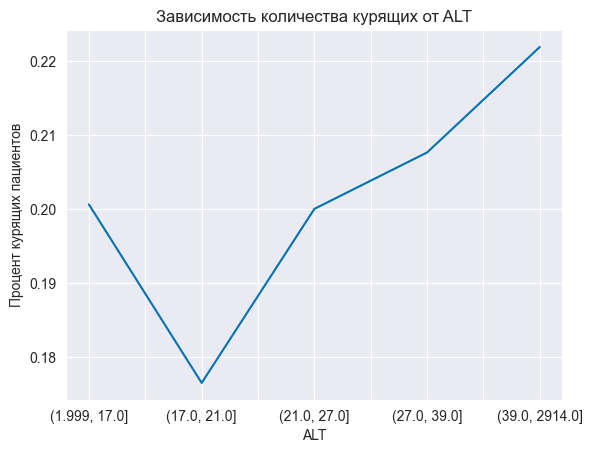

In [107]:
df_copy.groupby('alt_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от ALT')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('ALT');

**Есть зависимость курения с ALT**
Люди с повышенным ALT скорее курят чаще

### Gtp - Гамма‑глютамилтранспептидаза

count    13863.000000
mean        43.442978
std         50.342097
min          2.000000
25%         20.000000
50%         29.000000
75%         48.000000
max        999.000000
Name: gtp, dtype: float64


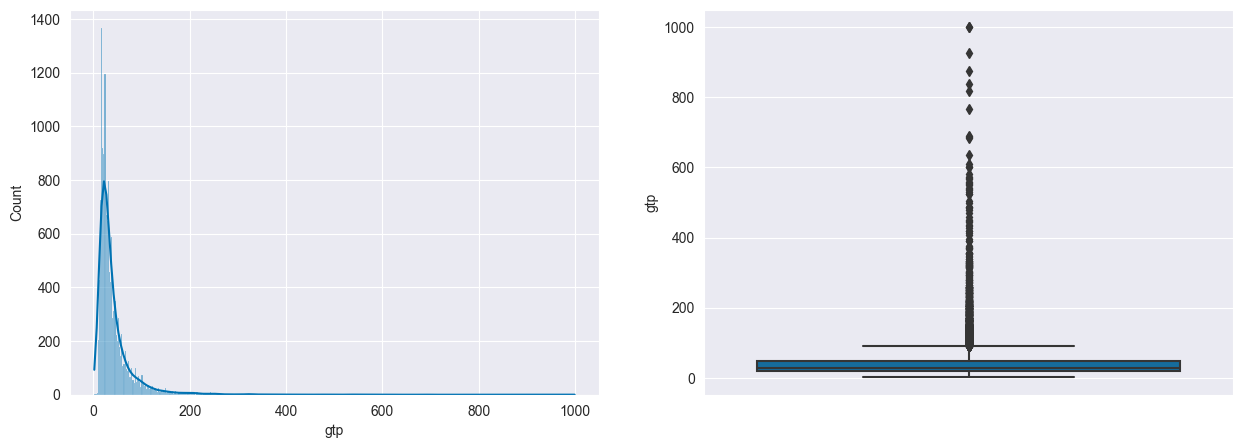

In [108]:
hist_box_describe_num(df, 'gtp')

У половины пациентов Гамма‑глютамилтранспептидаза находится в пределах от 20 до 48

Сгруппирую людей по Gtp:

In [109]:
df_copy['gtp_group'] = pd.qcut(df_copy['gtp'], 5, duplicates='drop')

In [110]:
df_copy.groupby('gtp_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
gtp_group,,
"(55.0, 999.0]",2708,0.322009
"(35.0, 55.0]",2615,0.235564
"(25.0, 35.0]",2797,0.189131
"(19.0, 25.0]",2544,0.146226
"(1.999, 19.0]",3199,0.128478


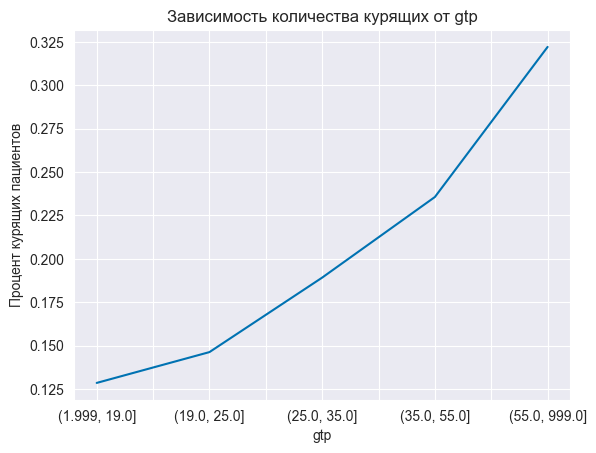

In [111]:
df_copy.groupby('gtp_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от gtp')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('gtp');

**Есть прямая зависимость курения с gtp**
Люди с повышенным gtp курят чаще

### Dental caries - Кариес

Бинарный признак

In [112]:
df.dental_caries.value_counts()

dental_caries
0    10923
1     2940
Name: count, dtype: int64

In [113]:
df_copy.groupby('dental_caries').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
dental_caries,,
1,2940,0.246599
0,10923,0.189966


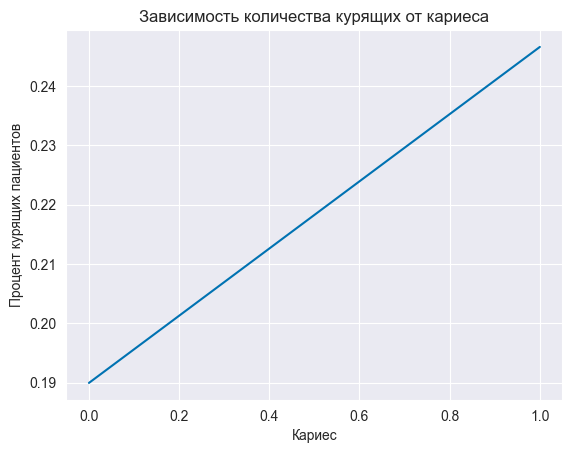

In [114]:
df_copy.groupby('dental_caries').smoking.mean().plot()
plt.title('Зависимость количества курящих от кариеса')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Кариес');

Кариес имеют ≈ 21.2% пациентов в обучающей выборке
**Есть зависимость курения с кариесом**
У курящих людей чаще встречается кариес

## 5.4 Категориальные переменные

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height_cm_           13863 non-null  int64  
 3   weight_kg_           13863 non-null  int64  
 4   waist_cm_            13863 non-null  float64
 5   eyesight_left_       13863 non-null  float64
 6   eyesight_right_      13863 non-null  float64
 7   hearing_left_        13863 non-null  float64
 8   hearing_right_       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting_blood_sugar  13863 non-null  float64
 12  cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  hdl                  13863 non-null  float64
 15  ldl                  13863 non-null 

In [116]:
df.describe(include='object')

,oral,tartar
count,13863,13863
unique,1,2
top,Y,Y
freq,13863,7517


Переменную Oral можно будет дропнуть, так как все её значения одинаковые - Y

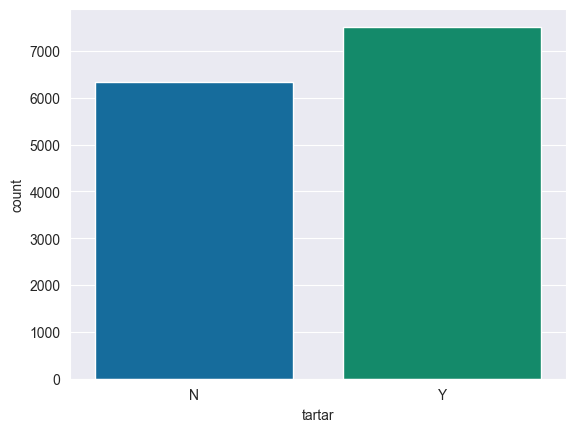

In [117]:
sns.countplot(data=df, x='tartar');

Людей, у которых есть зубной камень - больше, чем у которых нет

# 6. Preprocessing

## 6.1 Удаление выбросов

### Waist - окружность талии

У половины пациентов окружность талии составляет от 79 до 90 см
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента > 121

In [118]:
df = df.query('waist_cm_ < 121')

### Systolic - систолическое давление

У половины пациентов систолическое давление находится в пределах от 115 до 131
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 3 пациента: 1 пациент > 200, 2 пациента < 85

In [119]:
df = df.query('systolic < 200 & systolic > 85')

У половины пациентов диастолическое давление находится в пределах от 70 до 83
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента: 1 пациент > 133, 1 пациент < 45

In [120]:
df = df.query('relaxation < 135 & relaxation > 45')

### Fasting blood sugar - Сахар в крови

У половины пациентов сахар в крови находится в пределах от 90 до 104
**Выбросы в сравнении с тестовой выборкой:** Всего 2 пациента: 1 пациент > 400, 1 пациент < 50

In [121]:
df = df.query('fasting_blood_sugar < 400 & fasting_blood_sugar > 50')

### Cholesterol - холестерин

У половины пациентов холестерин находится в пределах от 169 до 216
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента > 400,

In [122]:
df = df.query('cholesterol < 400')

### Triglyceride - триглицерид

У половины пациентов триглицерид находится в пределах от 78 до 166
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 6 пациентов < 20,

In [123]:
df = df.query('triglyceride > 20')

### HDL - холестерин липопротеинов высокой плотности

У половины пациентов холестерин липопротеинов находится в пределах от 45 до 61
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 4 пациента: 1 пациент > 160, 3 пациента < 20,

In [124]:
df = df.query('hdl < 160 & hdl > 20')

### LDL - липопротеины низкой плотности

У половины пациентов липопротеины находится в пределах от 91 до 135
**Выбросы в сравнении с тестовой выборкой** ВСЕГО 9 пациентов: 6 пациентов > 1100, 3 пациента < 10,

In [125]:
df = df.query('ldl < 1100 & ldl > 10')

### Hemoglobin - гемоглобин

У половины пациентов гемоглобин находится в пределах от 14.8 до 16.1
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 9 пациентов: 3 пациента > 19.4, 6 пациентов < 8.6,

In [126]:
df = df.query('hemoglobin < 19.4 & hemoglobin > 8.6')

### Serum creatinine - Сывороточный креатинин

У половины пациентов сывороточный креатинин находится в пределах от 0.9 до 1.1
**Выбросы в сравнении тестовой выборкой:** ВСЕГО 10 пациентов > 2.6

In [127]:
df = df.query('serum_creatinine < 2.6')

### AST - Аспартатаминотрансфераз

У половины пациентов Аспартатаминотрансфераз находится в пределах от 20 до 30
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 4 пациента: 3 пациента > 600, 1 пациент < 8

In [128]:
df = df.query('ast < 600 & ast > 8')

### ALT - Аланинаминотрансфераза

У половины пациентов Аланинаминотрансфераза находится в пределах от 18 до 35
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 3 пациента: 1 пациент > 1600, 2 пациента < 3

In [129]:
df = df.query('alt < 1600 & alt > 3')

### Итого:
Из обучающего выборки было дропнуто 54 переменные, что составляет 0.3% от обучающей выборки.:

In [130]:
df.shape

(13809, 26)

## 6.2 Список всех фич

Составлю список всех фичей
Сразу удаляю фичу oral, т.к. она не несёт полезной информации

In [131]:
X = df.drop(['oral', 'smoking'], axis=1)
y = df.smoking
cat_features = ['tartar']
df_test = df_test.drop('oral', axis=1)
df_test_copy = df_test_copy.drop('oral', axis=1)

In [132]:
X.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,0,N
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,0,Y
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,0,Y
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,0,Y
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,0,Y


In [133]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: smoking, dtype: int64

In [134]:
cat_features

['tartar']

In [135]:
ввввввввввввввввв

NameError: name 'ввввввввввввввввв' is not defined

# 7. Modeling

## Baseline catboost

### Обучающая и тестовая выборки
Разделю обучающую выборку на train и test

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=659)

### Составаляю список фичей
В baselin`е оставлю все фичи

In [137]:
X.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,0,N
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,0,Y
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,0,Y
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,0,Y
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,0,Y


In [138]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: smoking, dtype: int64

In [139]:
cat_features

['tartar']

### Создание Pool`ов для модели
Создаю Pool`ы для удобства обучения моделей

In [140]:
train_data = Pool(X_train, y_train, cat_features=cat_features)
test_data = Pool(X_test, y_test, cat_features=cat_features)
full_data = Pool(X, y, cat_features=cat_features)

### Baseline model

### Настройка гиперпараметров
В baselin`е настрою только необходимые базовые гиперпараметры, а именно нужную метрику (F1), функцию потерь и random seed для воспроизводимости результатов. Более подробную настройку гиперпараметров можно будет увидеть в разбеле Best model.

In [142]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100}

In [143]:
model = CatBoostClassifier(**parameters)

### Обучение модели

In [144]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.057358
0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 158ms	remaining: 2m 37s
100:	learn: 0.1305785	test: 0.0721649	best: 0.0753425 (95)	total: 943ms	remaining: 8.4s
200:	learn: 0.2581386	test: 0.1412520	best: 0.1417069 (192)	total: 1.73s	remaining: 6.87s
300:	learn: 0.3652738	test: 0.1528861	best: 0.1555210 (299)	total: 2.57s	remaining: 5.96s
400:	learn: 0.4467354	test: 0.1834862	best: 0.1884498 (397)	total: 3.35s	remaining: 5.01s
500:	learn: 0.5243863	test: 0.2021116	best: 0.2021116 (500)	total: 4.15s	remaining: 4.13s
600:	learn: 0.5752296	test: 0.2130178	best: 0.2202381 (560)	total: 4.94s	remaining: 3.28s
700:	learn: 0.6254211	test: 0.2228739	best: 0.2290749 (649)	total: 5.74s	remaining: 2.45s
800:	learn: 0.6721845	test: 0.2296512	best: 0.2299854 (799)	total: 6.54s	remaining: 1.63s
900:	learn: 0.7108814	test: 0.2388489	best: 0.2439024 (882)	total: 7.33s	remaining: 805ms
999:	learn: 0.7518086	test: 0.2478386	best: 0.2536023 (981)	total: 8.1s	rem

### Feature importance
Посмотрю важность фичей в данной модели

In [145]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,8.834458
1,triglyceride,7.950693
2,waist_cm_,6.008348
3,alt,5.976088
4,age,5.889109
5,hemoglobin,5.818823
6,fasting_blood_sugar,5.496671
7,ldl,5.457218
8,hdl,5.398105
9,id,5.303189


Посмотрю основные, а так же все параметры модели

In [146]:
model.get_params()

{'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'eval_metric': 'F1',
 'cat_features': ['tartar']}

In [ ]:
model.get_all_params()

### Прогнозирование

#### Скоры

Создаю колонку для baseline catboost скора

In [147]:
df_test['baseline_cat_score'] = model.predict_proba(df_test)[:, 1]

In [148]:
df_test.baseline_cat_score.head()

0    0.255018
1    0.005462
2    0.091356
3    0.123879
4    0.146871
Name: baseline_cat_score, dtype: float64

Посмотрю распределение вероятностей (Score) курит или не курит

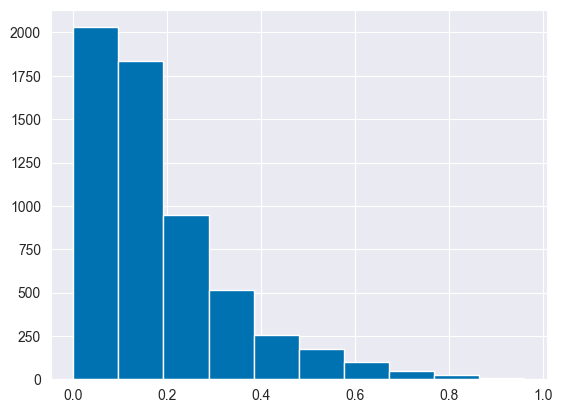

In [150]:
df_test.baseline_cat_score.hist();

#### Пороги

Посмотрю на пользователей вероятность курения которых > 0.5
Для вывода 0-ей и 1-иц нужно домножить на 1 иначе будет True и False
Процент курящих пациентов по порогу 0.5 ≈ 5.1%

In [151]:
((df_test.baseline_cat_score > 0.5) * 1).mean()

0.05116122517670818

Такая же вероятность у метода predict, т.к. порог по умолчанию = 0.5

In [ ]:
model.predict(df_test).mean()

В обучающем ДФ процент курильщиков ≈20% что существенно выше. По этому есть смысл понижать порог, но в Baselin`е оставлю порог по умолчанию

In [152]:
df.smoking.mean()

0.20204214642624374

In [153]:
df_test['baseline_cat_pred'] = (df_test.baseline_cat_score > 0.5) * 1

In [154]:
df_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,baseline_cat_score,baseline_cat_pred
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,0,Y,0.255018,0
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,0,N,0.005462,0
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,0,Y,0.091356,0
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,0,Y,0.123879,0
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,0,N,0.146871,0


### Сохранение результатов

In [155]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_pred
submission.to_csv('Baseline.csv', index=False)

Проверка значений:

In [156]:
submission.smoking.mean()

0.05116122517670818

In [157]:
submission.head()

,id,smoking
0,19200,0
1,7784,0
2,11682,0
3,9949,0
4,9378,0


**Kaggle result:** 0.3117

### Модификация

#### Изменение порога

Изменю порог с 0.5 на 0.2

In [ ]:
((df_test.baseline_cat_score > 0.20) * 1).mean()

#### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.2) * 1
submission.to_csv('Baseline_threshold0.2_GPU.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.42861 ↑

### Итого:
Наилучший порог для Baseline ≈ 0.2, F1 = 0.42861

## Catboost CV
Построю ещё одну Baseline модель, но на этот раз с использованием Кросс-валидации

### Настройка гиперпараметров
Т.к. это Baseline модель, оставляю большинство гиперпараметров по умолчанию.

In [158]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': 1000}

### Обучение модели

In [159]:
%%time
cv_data = cv(
    params=parameters,
    pool=full_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2067946824
bestIteration = 996

Training on fold [1/5]

bestTest = 0.2156573117
bestIteration = 926

Training on fold [2/5]

bestTest = 0.1974110032
bestIteration = 986

Training on fold [3/5]

bestTest = 0.1765601218
bestIteration = 969

Training on fold [4/5]

bestTest = 0.1979010495
bestIteration = 977

CPU times: total: 6min 32s
Wall time: 54.1 s


### Нахождение лучшего скора и лучшей итерации
Прибавляю к лучшей итерации единицу, т.к. отсчёт итераций в CV идёт с нуля

In [162]:
best_value = np.max(cv_data['test-F1-mean'])
best_iter = np.argmax(cv_data['test-F1-mean']) + 1

In [163]:
best_iter, best_value

(997, 0.19652263782834714)

### All data fitting
Обучение на всех данных:

In [164]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': best_iter,
              'verbose': 100}

In [165]:
model = CatBoostClassifier(**parameters)

In [166]:
%%time
model.fit(full_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.031694
0:	learn: 0.0014327	total: 8.94ms	remaining: 8.9s
100:	learn: 0.0247437	total: 877ms	remaining: 7.78s
200:	learn: 0.1172137	total: 1.75s	remaining: 6.95s
300:	learn: 0.1865385	total: 2.69s	remaining: 6.23s
400:	learn: 0.2507721	total: 3.57s	remaining: 5.3s
500:	learn: 0.2968750	total: 4.49s	remaining: 4.44s
600:	learn: 0.3389035	total: 5.39s	remaining: 3.55s
700:	learn: 0.3850328	total: 6.33s	remaining: 2.67s
800:	learn: 0.4249371	total: 7.27s	remaining: 1.78s
900:	learn: 0.4599398	total: 8.07s	remaining: 860ms
996:	learn: 0.4902013	total: 8.83s	remaining: 0us
CPU times: total: 1min
Wall time: 9.01 s


### Feature importance
Посмотрю важность фичей данной модели

In [167]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,9.745119
1,age,7.678255
2,triglyceride,7.617929
3,alt,6.895955
4,hemoglobin,6.064171
5,ldl,5.898067
6,waist_cm_,5.493183
7,fasting_blood_sugar,5.468548
8,hdl,5.005661
9,ast,4.770872


Посмотрю основные, а так же все параметры модели

In [168]:
model.get_params()

{'iterations': 997,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'eval_metric': 'F1'}

In [169]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 997,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntrop

### Прогнозирование

#### Скоры

Создаю колонку для catboost CV скора

In [170]:
df_test['baseline_cat_cv_score'] = model.predict_proba(df_test)[:, 1]

In [171]:
df_test.baseline_cat_cv_score.head()

0    0.212576
1    0.030004
2    0.203976
3    0.084975
4    0.165591
Name: baseline_cat_cv_score, dtype: float64

Посмотрю распределение скоров

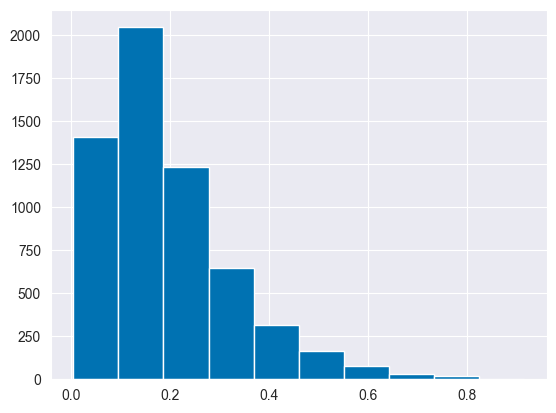

In [172]:
df_test.baseline_cat_cv_score.hist();

#### Пороги

По порогу 0.5 процент курящих людей ≈3.2% - что меньше, чем в обучающей выборке (≈20%)

In [174]:
((df_test.baseline_cat_cv_score > 0.5) * 1).mean()

0.032312352743184114

In [175]:
df_test['baseline_cat_cv_pred'] = (df_test.baseline_cat_cv_score > 0.5) * 1

In [176]:
df_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,baseline_cat_score,baseline_cat_pred,baseline_cat_cv_score,baseline_cat_cv_pred
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,0,Y,0.255018,0,0.212576,0
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,0,N,0.005462,0,0.030004,0
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,0,Y,0.091356,0,0.203976,0
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,0,Y,0.123879,0,0.084975,0
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,0,N,0.146871,0,0.165591,0


### Сохранение результатов

In [179]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_cv_pred
submission.to_csv('Cat_CV.csv', index=False)

Проверка значений:

In [180]:
submission.smoking.mean()

0.032312352743184114

In [181]:
submission.head()

,id,smoking
0,19200,0
1,7784,0
2,11682,0
3,9949,0
4,9378,0


**Kaggle result:** 0.23138 ↓, хуже чем Baseline

### Модификация

#### Изменяю порог до 0.2

In [182]:
((df_test.baseline_cat_cv_score > 0.2) * 1).mean()

0.3742847526085493

#### Сохранение результатов

In [183]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.2) * 1
submission.to_csv('Cat_CV_GPU_THRS02_LR_auto.csv', index=False)

Проверка значений:

In [184]:
submission.smoking.mean()

0.3742847526085493

In [185]:
submission.head()

,id,smoking
0,19200,1
1,7784,0
2,11682,1
3,9949,0
4,9378,0


**Kaggle result:** F1 = 0.43165 ↑ - лучше, чем Baseline THRS 0.2

### Итого:
Наилучший порог для CV ≈ 0.2, F1 = 0.43165. Лучше, чем Baseline THRSH = 0.2, F1 = 0.42861

## Best model
В данном разделе я покажу модель, с помощью которой, у меня получился лучший результат на Kaggle (6-ое место)
Данная модель использует: Баланс классов, Feature engineering (удаление некоторых фич из Дата сета), Построение модели с помощью GPU, изменение порога функции.
В данной модели не использовалась кросс-валидация, так как я не смог добиться с ней наилучшего результата.
В данной модели используется автоматический Learning rate, так как у меня не получилось подобрать LR лучше, даже с помощью Grid search

### Изменю список фич
Удалю ненужные фичи

In [186]:
X = df.drop(['oral', 'smoking', 'hearing_left_', 'hearing_right_', 'id', 'eyesight_left_', 'eyesight_right_','urine_protein', 'height_cm_', 'systolic', 'cholesterol', ], axis=1)
y = df.smoking
cat_features = ['tartar']
df_test_copy = df_test_copy.drop(['hearing_left_', 'hearing_right_', 'id', 'eyesight_left_', 'eyesight_right_','urine_protein', 'height_cm_', 'systolic', 'cholesterol', ], axis=1)

In [187]:
X.head()

,age,weight_kg_,waist_cm_,relaxation,fasting_blood_sugar,triglyceride,hdl,ldl,hemoglobin,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,65,75,91.0,79.0,107.0,51.0,71.0,52.0,14.0,1.2,20.0,16.0,122.0,0,N
1,35,85,97.0,88.0,117.0,239.0,46.0,120.0,14.6,0.7,20.0,25.0,40.0,0,Y
2,70,55,75.0,63.0,128.0,60.0,68.0,85.0,14.7,0.7,15.0,13.0,19.0,0,Y
3,35,85,83.0,80.0,100.0,155.0,53.0,125.0,17.2,0.8,22.0,18.0,17.0,0,Y
4,25,65,80.0,75.0,94.0,73.0,58.0,80.0,16.5,1.0,20.0,13.0,14.0,0,Y


In [188]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: smoking, dtype: int64

In [189]:
cat_features

['tartar']

### Обучающая и тестовая выборки
Заново разделю обучающую выборку на train и test, так как были удалены некоторые фичи.

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=659)

### Создание Pool`ов для модели
Создаю Pool`ы для удобства обучения моделей

In [191]:
train_data = Pool(X_train, y_train, cat_features=cat_features)
test_data = Pool(X_test, y_test, cat_features=cat_features)
full_data = Pool(X, y, cat_features=cat_features)

### Настройка гиперпараметров
В гиперпараметрах установлю: баланс классов, просчёт модели на GPU и Overfitting detector

In [193]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'early_stopping_rounds': 300}

In [194]:
model = CatBoostClassifier(**parameters)

### Обучение модели

In [195]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.058056
0:	learn: 0.6100672	test: 0.5636089	best: 0.5636089 (0)	total: 40ms	remaining: 40s
100:	learn: 0.6983700	test: 0.6161387	best: 0.6190550 (98)	total: 3.67s	remaining: 32.7s
200:	learn: 0.7375642	test: 0.6131263	best: 0.6194675 (107)	total: 7.28s	remaining: 28.9s
300:	learn: 0.7570418	test: 0.6003841	best: 0.6194675 (107)	total: 11s	remaining: 25.6s
400:	learn: 0.7716029	test: 0.5982121	best: 0.6194675 (107)	total: 14.5s	remaining: 21.7s
bestTest = 0.6194674581
bestIteration = 107
Shrink model to first 108 iterations.
CPU times: total: 18.6 s
Wall time: 15.4 s


### Feature importance

Посмотрю важность фичей

In [196]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,age,16.037052
1,gtp,15.553149
2,alt,11.059059
3,triglyceride,10.394328
4,hemoglobin,6.687902
5,ldl,6.351543
6,waist_cm_,5.977403
7,fasting_blood_sugar,4.483045
8,serum_creatinine,4.227178
9,ast,4.210789


Посмотрю основные, а так же все параметры модели

In [197]:
model.get_params()

{'iterations': 1000,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'auto_class_weights': 'Balanced',
 'eval_metric': 'F1',
 'task_type': 'GPU',
 'early_stopping_rounds': 300,
 'cat_features': ['tartar']}

In [198]:
model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'FeatureFreq:CtrBorderCount=15:CtrBorderType=Median:Prior=0/1'],
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'od_pval': 0,
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'ctr_history_unit': 'Sample',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'devices': '-1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'ma

### Прогнозирование

#### Скоры

Создаю колонку для лучшего catboost скора

In [199]:
df_test['best_cat_score'] = model.predict_proba(df_test_copy)[:, 1]

In [200]:
df_test.best_cat_score.head()

0    0.500722
1    0.078501
2    0.437625
3    0.347356
4    0.590422
Name: best_cat_score, dtype: float64

Посмотрю распределение вероятностей (Score) курит или не курит

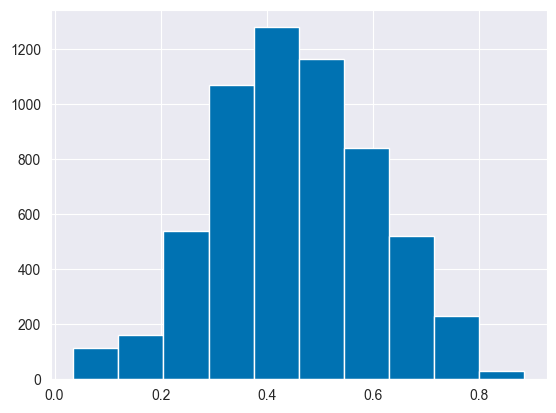

In [202]:
df_test.best_cat_score.hist();

#### Пороги

По порогу 0.5 процент курящих людей ≈36.68% - что выше, чем в обучающей выборке (≈20%)

In [203]:
((df_test.best_cat_score > 0.5) * 1).mean()

0.3668798384382363

Такая же вероятность у метода predict, т.к. порог по умолчанию = 0.5

In [204]:
model.predict(df_test_copy).mean()

0.3668798384382363

In [205]:
df_test['best_cat_pred'] = (df_test.best_cat_score > 0.5) * 1

In [206]:
df_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,baseline_cat_score,baseline_cat_pred,baseline_cat_cv_score,baseline_cat_cv_pred,best_cat_score,best_cat_pred
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,0,Y,0.255018,0,0.212576,0,0.500722,1
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,0,N,0.005462,0,0.030004,0,0.078501,0
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,0,Y,0.091356,0,0.203976,0,0.437625,0
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,0,Y,0.123879,0,0.084975,0,0.347356,0
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,0,N,0.146871,0,0.165591,0,0.590422,1


### Сохранение результатов

In [207]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.best_cat_pred
submission.to_csv('Cat_ACW_GPU_drop9F.csv', index=False)

Проверка значений:

In [208]:
submission.smoking.mean()

0.3668798384382363

In [209]:
submission.head()

,id,smoking
0,19200,1
1,7784,0
2,11682,0
3,9949,0
4,9378,1


**Kaggle result:** 0.43846 ↑↑↑

### Модификация

#### Изменение порога

Изменю порог с 0.5 на 0.4983

In [214]:
((df_test.best_cat_score > 0.4983) * 1).mean()

0.3699091215079098

#### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.4983) * 1
submission.to_csv('Cat_ACW_GPU_drop9F_THRSH0.4983.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** F1 = 0.43908

### Итого:
Наилучший порог = 0.4983, а F1 = 0.43908, что лучше, чем Baseline, а так же CV.